<div style="color:orange; background-color:black; padding:10px; text-align:center;font-size:90px; font-weight:bold;">
    Egypt Real Estate Data Project 
</div>

<div style="background-color:black; padding:10px; text-align:center;">
  <img src="https://images.unsplash.com/photo-1686340251533-0f8965f90b78?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" 
       style="width:100%; max-width:1300px; height:550px; object-fit:cover; border-radius:8px;">
</div>


<span style="color:orange; font-size:60px; font-weight:bold;">📊 Introduction</span>

<span style="font-size:18px;">
In this project, we explored and cleaned a real estate dataset collected from <strong>Aqarmap</strong>, one of the largest real estate platforms in Egypt.  
The main goal of this project was to <strong>prepare the data</strong> for future modeling by performing a comprehensive preprocessing phase.  

This included:
<ul>
  <li>Handling missing values</li>
  <li>Cleaning and standardizing columns</li>
  <li>Encoding categorical variables</li>
  <li>Extracting new features</li>
  <li>Converting types and correcting outliers</li>
</ul>

In addition to the preprocessing phase, we also performed some <strong>exploratory analysis</strong> by asking key <strong>analytical questions</strong> to uncover insights about real estate prices and patterns in Egypt.
</span>

 ..

.

<span style="color:orange; font-size:50px; font-weight:bold;">
📦 Upload the important libraries and load the dataset
</span>



In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

# Import outlier detection tool from datasist
from datasist.structdata import detect_outliers

# Ignore warning messages to keep the notebook clean
import warnings
warnings.filterwarnings('ignore')

# Display all columns in DataFrame outputs
pd.set_option('display.max_columns', None)


In [2]:
# Load the dataset from CSV
df = pd.read_csv('real_estate_data_before_cleaning.csv')

# Rename columns for clarity:
# 'ad_type' → 'owner_type'
# 'date' → 'year_of_building'
df = df.rename(columns={
    'ad_type': 'owner_type',
    'date': 'year_of_building'
})

# Display the first 5 rows to preview the dataset
df.head()


ad_id  owner_type                                           ad_title  \
0  EG-5602613        مطور  امتلك وحدتك في برايم لوكيشن علي الشارع مباشره ...   
1  EG-6021834   مالك عقار                  شقه للبيع سوبر لوكس كورنيش المقطم   
2  EG-6021385  مسوق عقاري  للبيع اخر شقه 160م بخصم 35% بكمبوند ذا ايكون ا...   
3  EG-6015880  مسوق عقاري             دوبلكس للبيع فى شارع مسجد الاقصى م 300   
4  EG-6018485  مسوق عقاري  تاج سيتي - امتلك فوري شقة بحديقة ريسيل في تاج ...   

                                            location      area  rooms  \
0         ['القاهرة الكبرى  /  فيدا ريزيدنس - كيان']   96 متر²  2 غرف   
1          ['القاهرة الكبرى  /  شارع كورنيش المقطم']  230 متر²  4 غرف   
2  ['القاهرة الكبرى  /  كمبوند ذا ايكون جاردنز - ...  160 متر²  3 غرف   
3    ['القاهرة الكبرى  /  شارع جامعة الدول العربية']  300 متر²  3 غرف   
4  ['القاهرة الكبرى  /  تاج سلطان - كمبوند تاج سي...  110 متر²  2 غرف   

  bathrooms     finish_status floor_number year_of_building  \
0    2 حمام         نصف تشطيب            2             2028   
1    2 حمام         سوبر لوكس            2             2025   
2    2 حمام         نصف تشطيب            2             2027   
3    3 حمام  اكسترا سوبر لوكس           11             2020   
4    2 حمام         نصف تشطيب       الارضي             2025   

                           views  payment_method total_reviews region_rating  \
0  ['تطل على', 'الشارع الرئيسي']  نقداً أو تقسيط           5.8           6.0   
1           ['تطل على', 'ناصيه']           نقداً           6.7           6.0   
2           ['تطل على', 'حديقة']           نقداً           8.7            10   
3  ['تطل على', 'الشارع الجانبي']           نقداً           8.3           9.0   
4           ['تطل على', 'حديقة']           نقداً           8.7            10   

  schools_rating services quietness location_rating transportation_rating  \
0            6.0      6.0       9.0             4.0                   4.0   
1            6.0      7.0       8.0             9.0                   6.0   
2            9.0      9.0       9.0             6.0                   5.0   
3            8.0      9.0       2.0              10                   9.0   
4            9.0      9.0       9.0             6.0                   5.0   

  markets_rating                                        description  \
0            5.0  ['وصف الإعلان', 'في قلب حدايق اكتوبر ?????????...   
1            6.0  ['وصف الإعلان', 'شقه للبيع سوبر لوكس كورنيش ال...   
2             10  ['وصف الإعلان', 'امتلك اخر شقة 3 غرف ( استلام ...   
3             10  ['وصف الإعلان', 'دوبلكس حديث التشطيب والاضافه ...   
4             10  ['وصف الإعلان', 'شقق للبيع في كمبوندات القاهرة...   

                                                link   price_per_meter  \
0  https://aqarmap.com.eg/ar/listing/5602613-for-...  20,000 جنيه/متر²   
1  https://aqarmap.com.eg/ar/listing/6021834-for-...  22,174 جنيه/متر²   
2  https://aqarmap.com.eg/ar/listing/6021385-for-...  29,250 جنيه/متر²   
3  https://aqarmap.com.eg/ar/listing/6015880-for-...  30,000 جنيه/متر²   
4  https://aqarmap.com.eg/ar/listing/6018485-for-...  53,636 جنيه/متر²   

                 price  
0  1,920,000\n    جنيه  
1  5,100,000\n    جنيه  
2  4,680,000\n    جنيه  
3  9,000,000\n    جنيه  
4  5,900,000\n    جنيه

In [3]:
df.columns

Index(['ad_id', 'owner_type', 'ad_title', 'location', 'area', 'rooms',
       'bathrooms', 'finish_status', 'floor_number', 'year_of_building',
       'views', 'payment_method', 'total_reviews', 'region_rating',
       'schools_rating', 'services', 'quietness', 'location_rating',
       'transportation_rating', 'markets_rating', 'description', 'link',
       'price_per_meter', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32380 entries, 0 to 32379
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ad_id                  32380 non-null  object
 1   owner_type             32380 non-null  object
 2   ad_title               32380 non-null  object
 3   location               32380 non-null  object
 4   area                   32380 non-null  object
 5   rooms                  32099 non-null  object
 6   bathrooms              32084 non-null  object
 7   finish_status          32067 non-null  object
 8   floor_number           32380 non-null  object
 9   year_of_building       32380 non-null  object
 10  views                  32380 non-null  object
 11  payment_method         32380 non-null  object
 12  total_reviews          14920 non-null  object
 13  region_rating          14920 non-null  object
 14  schools_rating         14920 non-null  object
 15  services           

In [5]:
# Show The num of duplicated in the data
df.duplicated(subset='link').sum()

np.int64(8688)

In [6]:
# remove the duplicates
df.drop_duplicates(subset='link',inplace=True ,ignore_index=True)

<span style="color:orange; font-size:70px; font-weight:bold;">
➡️ Univariate Analysis
</span>


<span style="color:orange; font-size:40px; font-weight:bold;">
🧼 Data Cleaning & Exploration
</span>


<span style="color:orange; font-size:30px; font-weight:bold;">
🧹 I will go through each column to clean it, extract useful features (if any), and visualize the results.
</span>


<span style="color:turquoise; font-size:60px; font-weight:bold;"> 1-  ad_id</span>

In [7]:

df.ad_id.unique()

array(['EG-5602613', 'EG-6021834', 'EG-6021385', ..., 'EG-5963858',
       'EG-5967855', 'EG-5963985'], shape=(23688,), dtype=object)

In [8]:
df.ad_id=df.ad_id.apply(lambda x : x.split(',')[-1].replace(']','').replace("'",''))

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 2-  owner_type</span>

In [9]:
df.owner_type.unique()

array(['مطور', 'مالك عقار', 'مسوق عقاري',
       "['  نوع المعلن ', ' ', 'المطور']", 'مطور كمبوند',
       "['  نوع المعلن ', ' ', 'وسيط']", '[]'], dtype=object)

In [10]:
# Clean the 'owner_type' column by extracting the last item if it's a comma-separated list
# Also removes unwanted characters like quotes and brackets

df['owner_type'] = df['owner_type'].apply(
    lambda x: x.split(',')[-1].replace("'", "").replace("]", "").strip()
)

# Display unique cleaned values
df['owner_type'].unique()


array(['مطور', 'مالك عقار', 'مسوق عقاري', 'المطور', 'مطور كمبوند', 'وسيط',
       '['], dtype=object)

In [11]:
# there unknown vlaue and make it NaN value
df.loc[df['owner_type']=='[','owner_type']=np.nan

# translate the category to English
df['owner_type'] = df['owner_type'].replace({
                                                'المطور': 'The Developer',
                                                'مطور': 'Developer',
                                                'مطور كمبوند': 'Compound Developer',
                                                'مالك عقار': 'Property Owner',
                                                'مسوق عقاري': 'Real Estate Marketer',
                                                'وسيط': 'Broker'
                                            })


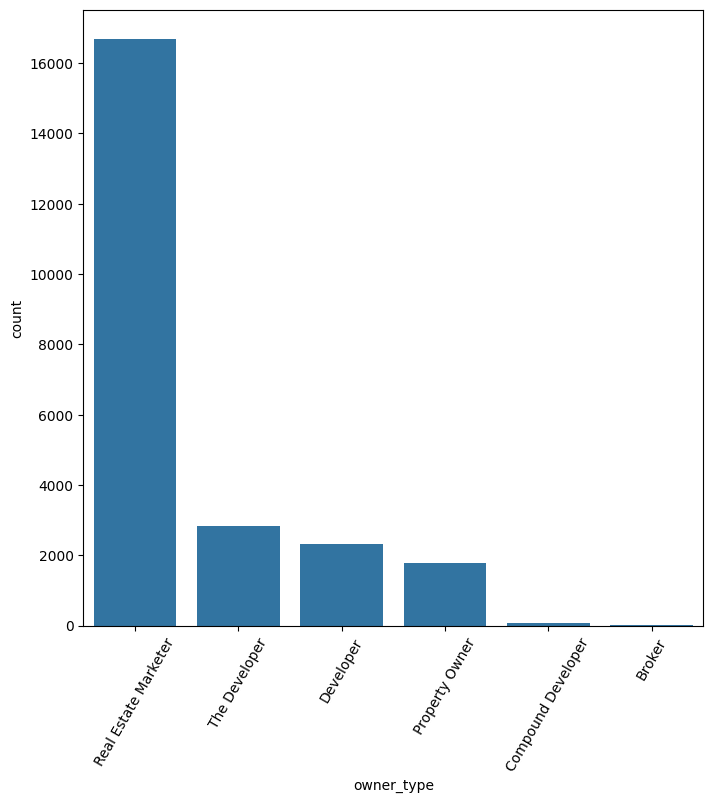

In [12]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='owner_type',order=df['owner_type'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

In [13]:

df.owner_type.value_counts(dropna=False)

owner_type
Real Estate Marketer    16689
The Developer            2824
Developer                2326
Property Owner           1781
Compound Developer         65
Broker                      6
NaN                         1
Name: count, dtype: int64

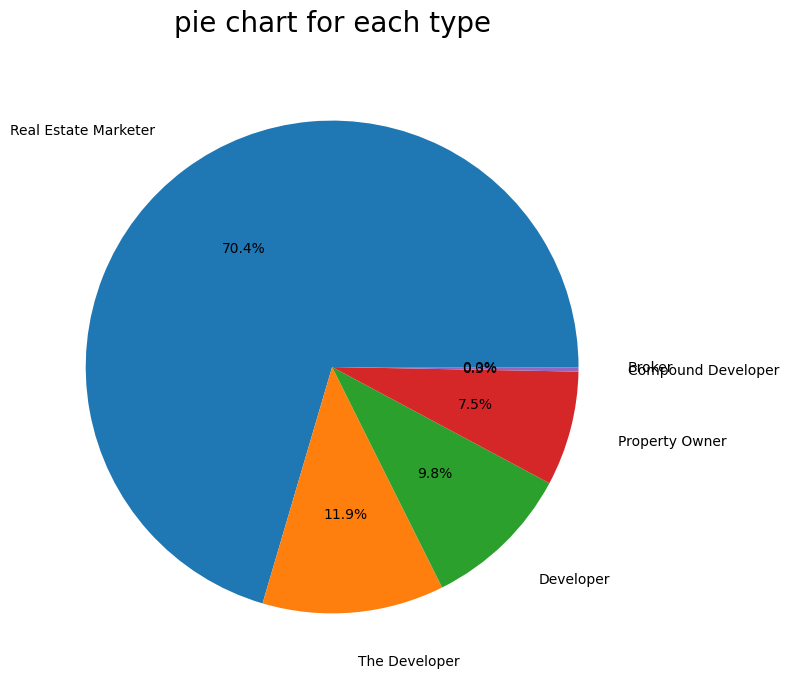

In [14]:
plt.figure(figsize=(8, 8))
values=df.owner_type.value_counts()
plt.pie(x=values  ,labels=values.index  ,autopct="%1.1f%%",labeldistance=1.2)
plt.title('pie chart for each type',pad=20,fontdict={'fontsize':20})
plt.show()

In [15]:
df[df.owner_type.isna()]

ad_id owner_type                                           ad_title  \
22056     [        NaN  ستوديو  في هايد بارك استلام فوري بأفضل سعر ومو...   

                                                location area rooms bathrooms  \
22056  ['القاهرة الكبرى  /  سنتر فيل - كمبوند هايد با...   []    []        []   

      finish_status floor_number year_of_building views payment_method  \
22056            []           []               []    []             []   

      total_reviews region_rating schools_rating services quietness  \
22056           NaN           NaN            NaN      NaN       NaN   

      location_rating transportation_rating markets_rating description  \
22056             NaN                   NaN            NaN         NaN   

                                                    link price_per_meter  \
22056  https://aqarmap.com.eg/ar/listing/5259196-for-...              []   

                     price  
22056  5,500,000\n    جنيه

In [16]:
# Remove rows where 'owner_type' is missing
df.dropna(subset='owner_type', inplace=True)

# Standardize category names: unify 'The Developer' and 'Developer'
df['owner_type'] = df['owner_type'].replace({'The Developer': 'Developer'})

# Check value counts after cleaning
df['owner_type'].value_counts(dropna=False)


owner_type
Real Estate Marketer    16689
Developer                5150
Property Owner           1781
Compound Developer         65
Broker                      6
Name: count, dtype: int64

In [17]:
# Function to plot a bar chart (countplot) for a categorical column
def bar_func(col, title=None, dataframe=df):
    plt.figure(figsize=(8, 8))
    ax = sns.countplot(data=dataframe, x=col, order=dataframe[col].value_counts().index, hue=col)
    
    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
    
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    if title:
        plt.title(title, fontdict={'size': 20})
    plt.show()

# Function to plot a pie chart for a categorical column
def pie_func(col, title=None, explode=None, end=None, dataframe=df):
    plt.figure(figsize=(8, 8))
    values = dataframe[col].value_counts()[0:end]  # Get top 'end' categories
    
    # Check if explode list is valid
    if type(explode) == list and len(explode) == len(values):
        plt.pie(x=values, labels=values.index, explode=explode, autopct="%1.2f%%")
    else:
        plt.pie(x=values, labels=values.index, autopct="%1.2f%%")
    
    if title:
        plt.title(title, pad=20, fontdict={'fontsize': 20})
    plt.show()


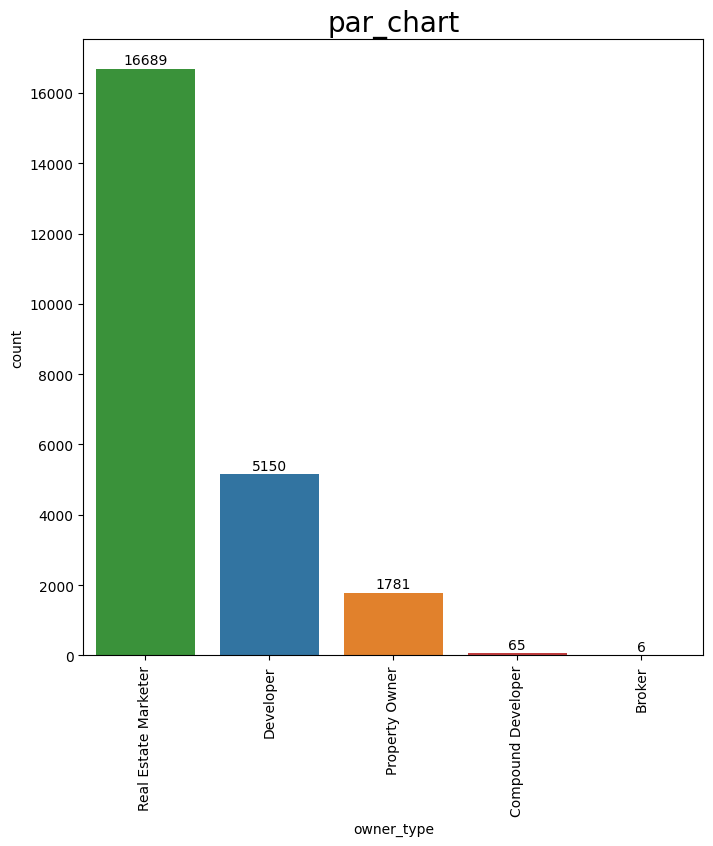

In [18]:

bar_func('owner_type', 'par_chart')

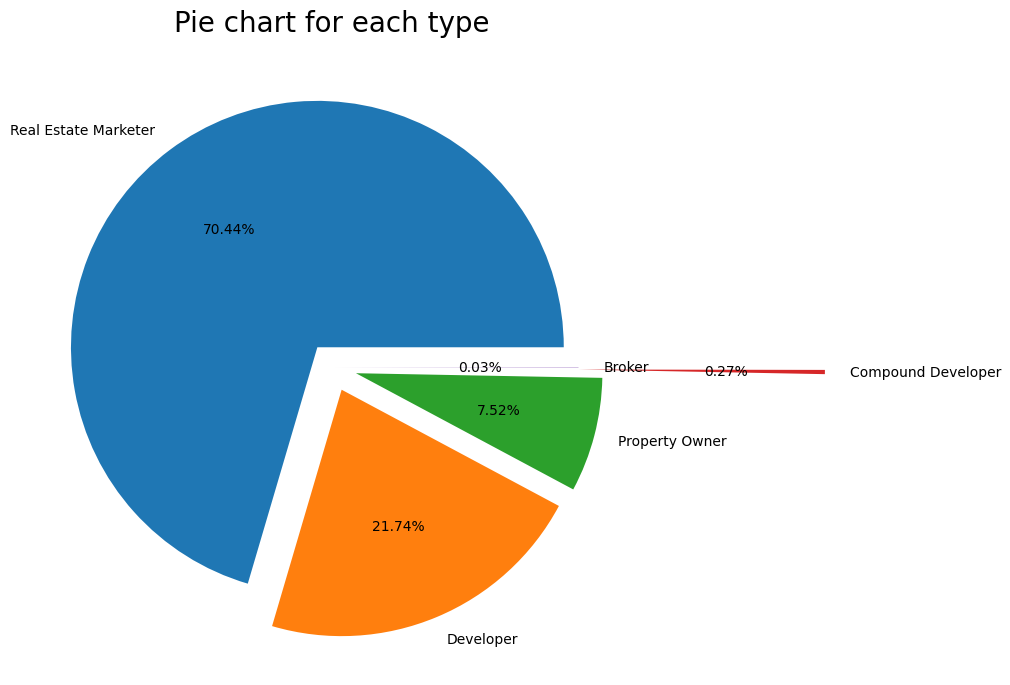

In [19]:

pie_func('owner_type' , 'Pie chart for each type' ,[0.1,0.1,0.1,1 ,.0] )

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 3-  ad_title</span>

In [20]:
df.ad_title

0        امتلك وحدتك في برايم لوكيشن علي الشارع مباشره ...
1                        شقه للبيع سوبر لوكس كورنيش المقطم
2        للبيع اخر شقه 160م بخصم 35% بكمبوند ذا ايكون ا...
3                   دوبلكس للبيع فى شارع مسجد الاقصى م 300
4        تاج سيتي - امتلك فوري شقة بحديقة ريسيل في تاج ...
                               ...                        
23687      امتلك شقة 195م في بيت الوطن وشوفها قبل ما تدفع!
23688    شقة 146م و 72 حديقة بمقدم1,8 مليون بافضل سعر ب...
23689       شقة للبيع بالتجمع الخامس بالقرب من طريق السويس
23690    شقة للبيع حدائق اكتوبر شارع زويل امام جامعه زو...
23691    MS شقة للبيع 125م أرضي+ 50م جاردن 3 غرف في موق...
Name: ad_title, Length: 23691, dtype: object

In [21]:
# Create a new column 'type_of_unite' by extracting unit type from 'ad_title' text
# Detects whether the unit is a Studio, Duplex, Penthouse, or defaults to Apartment

def title_func(x):
    x = str(x)  # Ensure input is a string
    if 'ستودي' in x:
        return 'Studio'
    elif 'دوبلكس' in x:
        return 'Duplex'
    elif 'بنتهاوس' in x:
        return 'Penthouse'
    else:
        return 'Apartment'

# Apply the function to extract unit type
df['type_of_unite'] = df['ad_title'].apply(title_func)

# Display value counts including NaNs (if any)
df['type_of_unite'].value_counts(dropna=False)


type_of_unite
Apartment    21531
Studio        1091
Duplex         713
Penthouse      356
Name: count, dtype: int64

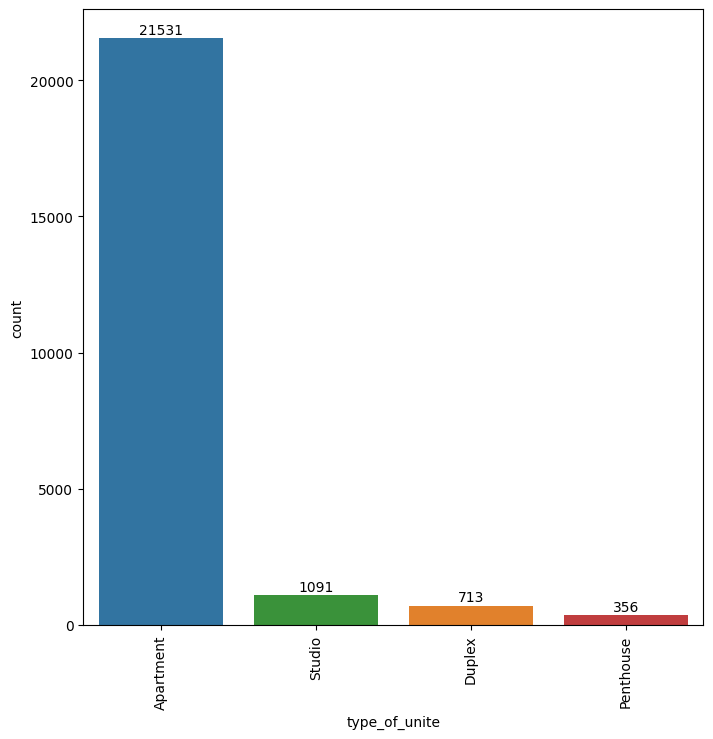

In [22]:
bar_func('type_of_unite')

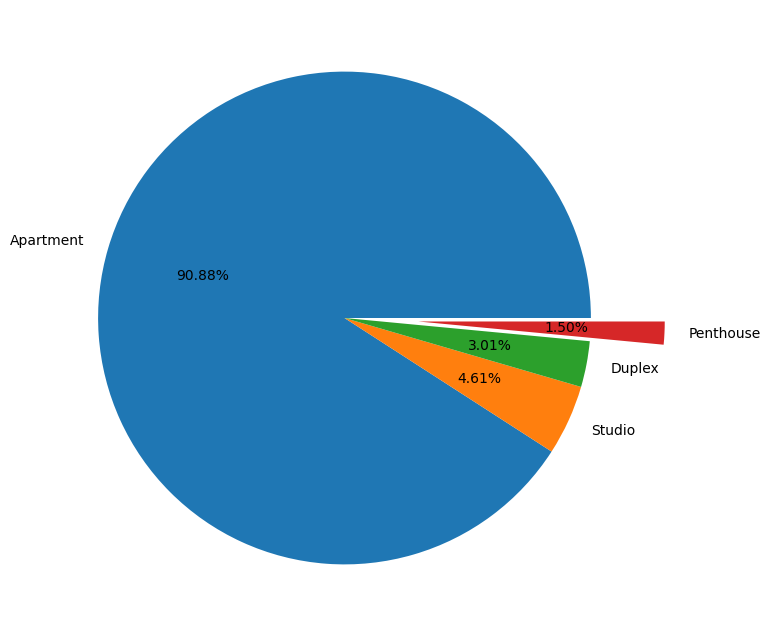

In [23]:

pie_func('type_of_unite' ,explode = [0.0,0.0,0.0,.3] )

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 4-  location</span>

In [24]:
df.location.unique()


array(["['القاهرة الكبرى  /  فيدا ريزيدنس - كيان']",
       "['القاهرة الكبرى  /  شارع كورنيش المقطم']",
       "['القاهرة الكبرى  /  كمبوند ذا ايكون جاردنز - ستايل هوم']", ...,
       "['القاهرة الكبرى  /  لوسيل ريزيدنس - مارجينز']",
       "['القاهرة الكبرى  /  شارع يحي المشد']",
       "['القاهرة الكبرى  /  النرجس 6']"], shape=(2708,), dtype=object)

<span style="color:turquoise; font-size:40px; font-weight:bold;"> -  in_compound</span>

In [25]:
# Create a binary feature 'in_compound' to indicate whether the unit is in a compound
# If the word 'كمبوند' appears in either 'ad_title' or 'location', mark as 1 (True), else 0

def x(df):
    if 'كمبوند' in str(df['ad_title']) or 'كمبوند' in str(df['location']):
        return 1
    return 0

# Apply the function row-wise
df['in_compound'] = df.apply(x, axis=1)

# Check the distribution of the new feature
df['in_compound'].value_counts()


in_compound
0    14813
1     8878
Name: count, dtype: int64

<span style="color:turquoise; font-size:40px; font-weight:bold;"> -  city</span>

In [26]:

df['city']=df.location.apply(lambda x: np.nan    if x=='[]'  else    x.replace("['",'').replace("']",'').split('/')[0].strip() )
df.city.unique()


array(['القاهرة الكبرى', 'الغردقة', 'الساحل الشمالي', 'القليوبية',
       'الاسكندرية', 'مرسى مطروح', 'العين السخنة', 'شرم الشيخ',
       'الدقهلية', 'أسيوط', 'الشرقية', 'دمياط', 'البحيرة', 'الفيوم',
       'كفر الشيخ', 'المنوفية', 'السويس', 'سوهاج', 'بور سعيد', 'الأقصر',
       'الغربية', 'المنيا', 'أسوان', 'راس سدر', 'قنا', 'الاسماعيلية',
       'بني سويف', 'شمال سيناء'], dtype=object)

In [27]:
area_translation = {
    'القاهرة الكبرى': 'Greater Cairo',
    'الغردقة': 'Hurghada',
    'الساحل الشمالي': 'North Coast',
    'القليوبية': 'Qalyubia',
    'الاسكندرية': 'Alexandria',
    'مرسى مطروح': 'Marsa Matrouh',
    'العين السخنة': 'Ain Sokhna',
    'شرم الشيخ': 'Sharm El-Sheikh',
    'الدقهلية': 'Dakahlia',
    'أسيوط': 'Assiut',
    'الشرقية': 'Sharqia',
    'دمياط': 'Damietta',
    'البحيرة': 'Beheira',
    'الفيوم': 'Fayoum',
    'كفر الشيخ': 'Kafr El-Sheikh',
    'المنوفية': 'Monufia',
    'السويس': 'Suez',
    'سوهاج': 'Sohag',
    'بور سعيد': 'Port Said',
    'الأقصر': 'Luxor',
    'الغربية': 'Gharbia',
    'المنيا': 'Minya',
    'أسوان': 'Aswan',
    'راس سدر': 'Ras Sudr',
    'قنا': 'Qena',
    'الاسماعيلية': 'Ismailia',
    'بني سويف': 'Beni Suef',
    'شمال سيناء': 'North Sinai'
}
df.city=df.city.replace(area_translation)
df.city.value_counts()

city
Greater Cairo      17802
Alexandria          2149
Hurghada            1341
North Coast          616
Damietta             474
Qalyubia             337
Dakahlia             227
Sharqia               99
Ain Sokhna            94
Port Said             90
Gharbia               60
Marsa Matrouh         60
Assiut                58
Monufia               53
Beheira               38
Ismailia              36
Fayoum                30
Sharm El-Sheikh       28
Suez                  22
Kafr El-Sheikh        19
Sohag                 18
Minya                 14
Ras Sudr              12
Aswan                  6
Luxor                  3
Qena                   2
Beni Suef              2
North Sinai            1
Name: count, dtype: int64

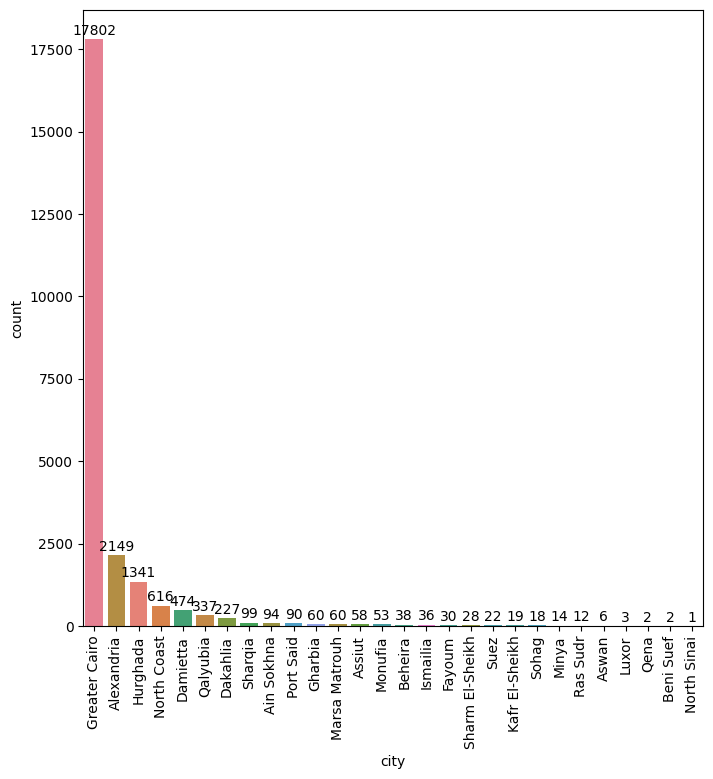

In [28]:
bar_func ('city')


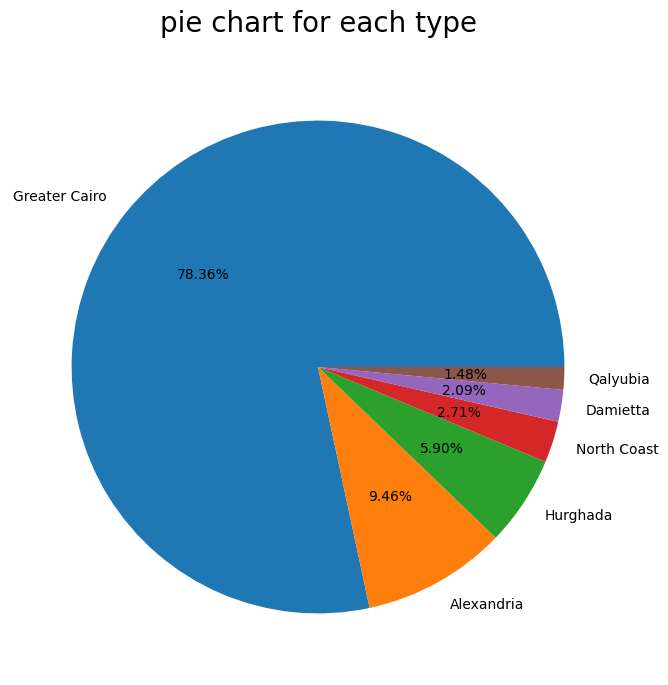

In [29]:
pie_func('city' ,'pie chart for each type' ,end=6)


<span style="color:turquoise; font-size:40px; font-weight:bold;"> -  region</span>

In [30]:

df['region']=df.location.apply(lambda x: np.nan   if x=='[]'    else    x.replace("['",'').replace("']",'').split('/')[1].strip() )
df.region.unique()

array(['فيدا ريزيدنس - كيان', 'شارع كورنيش المقطم',
       'كمبوند ذا ايكون جاردنز - ستايل هوم', ...,
       'لوسيل ريزيدنس - مارجينز', 'شارع يحي المشد', 'النرجس 6'],
      shape=(2608,), dtype=object)

In [31]:
df.region.nunique()

2608

In [32]:
# I will take top count 30 region and translat name of them to english
ind=df.region.value_counts()[:30].index
ind

Index(['شارع الخمسين', 'حي الكوثر', 'كمبوند ادريس هوم - أركان', 'اللبيني',
       'كالم ريزيدنس - دي سي ام', 'كمبوند الياسمين جاردنز',
       'الحي اللاتيني - الشركة السعودية المصرية للتعمير',
       'شاطئ النخيل - ٦ اكتوبر', 'شارع نصر عمار', 'المنطقة السياحية ب',
       'فيدا ريزيدنس - كيان', 'ايلان - كمبوند سراي', 'كمبوند فيلدج ويست - درة',
       'شارع الشيراتون', 'المقصد بارك - المقصد ريزيدنس', 'الحي الثاني',
       'كمبوند بلوم فيلدز - تطوير مصر', 'منتجعات الغردقة',
       'أوريجامي جاردنز - كمبوند تاج سيتي', 'وسط البلد', 'المنطقة السياحية أ',
       'كمبوند إنترادا - صروح', 'البيطاش', 'الهانوفيل',
       'بيت الوطن الحي التاسع', 'طريق بيت الوطن',
       'كمبوند كابيتال هايتس 2 - الصفوة', 'كمبوند أشجار سيتي - اي جي اي',
       'الأندلس 1', 'المجاوره الرابعه'],
      dtype='object', name='region')

In [33]:
locations_dict = {
    "شارع الخمسين": "El Khamsin Street",
    "حي الكوثر": "Al Kawthar District",
    "كمبوند ادريس هوم - أركان": "Idris Home Compound - Arkan",
    "اللبيني": "El Lebeny",
    "كالم ريزيدنس - دي سي ام": "Calm Residence - DCM",
    "كمبوند الياسمين جاردنز": "Al Yasmin Gardens Compound",
    "الحي اللاتيني - الشركة السعودية المصرية للتعمير": "Latin District - Saudi Egyptian Construction",
    "شاطئ النخيل - ٦ اكتوبر": "Al Nakheel Beach - 6th of October",
    "شارع نصر عمار": "Nasser Ammar Street",
    "المنطقة السياحية ب": "Touristic Area B",
    "فيدا ريزيدنس - كيان": "Vida Residence - Kayan",
    "ايلان - كمبوند سراي": "Elan - Sarai Compound",
    "كمبوند فيلدج ويست - درة": "Village West Compound - Dorra",
    "شارع الشيراتون": "Sheraton Street",
    "المقصد بارك - المقصد ريزيدنس": "Al Maqsed Park - Al Maqsed Residence",
    "الحي الثاني": "Second District",
    "كمبوند بلوم فيلدز - تطوير مصر": "Bloomfields Compound - Tatweer Misr",
    "منتجعات الغردقة": "Hurghada Resorts",
    "أوريجامي جاردنز - كمبوند تاج سيتي": "Origami Gardens - Taj City Compound",
    "وسط البلد": "Downtown",
    "المنطقة السياحية أ": "Touristic Area A",
    "كمبوند إنترادا - صروح": "Entrada Compound - Sorouh",
    "البيطاش": "Al Bitash",
    "الهانوفيل": "Al Hanoville",
    "بيت الوطن الحي التاسع": "Beit Al Watan - District 9",
    "طريق بيت الوطن": "Beit Al Watan Road",
    "كمبوند كابيتال هايتس 2 - الصفوة": "Capital Heights 2 Compound - Al Safwa",
    "كمبوند أشجار سيتي - اي جي اي": "Ashgar City Compound - IGI",
    "الأندلس 1": "Al Andalus 1",
    "المجاوره الرابعه": "Fourth Neighborhood",
    'جاز مول': 'Ghaz Mall',
    'سوما بريز - سوما باي': 'Soma Breeze – Soma Bay',
    'خليج سوما': 'Soma Bay',
    'كمبوند جريان - بالم هيلز': 'Gryian Compound – Palm Hills',
    'سنترال كابيتال مول - عامر جروب': 'Central Capital Mall – Amer Group',
    'كمبوند 31 ويست - ام سكويرد': '31 West Compound – M Squared',
    'كمبوند بلانكس - مناج': 'Blancs Compound – Menagy',
    'منتجع كالي كوست - ميفين': 'Cali Coast Resort – Maven',
    'منتجع مارينا 5': 'Marina 5 Resort',
    'منتجع دوس - أكام الراجحي\t': 'Doss Resort – Akam Al Rajhi',
    'منتجع كارنيليا - أجنا': 'Carnelia Resort – Ajna',
    'كمبوند نمق - ميلي للتطوير العقاري': 'Namaq Compound – Mily Developments',
    'كومباس بيلدنج - المنصور': 'Compass Building – Al Mansour',
    'منتجع ستوريا ديل ماري - كاستيلو': 'Storia Del Mare Resort – Castello',
    'منتجع جورا الجلالة - نيو جيرسي': 'Jura El Galala Resort – New Jersey Developments',
    'منتجع باي ويست - سوما باي': 'Bay West Resort – Soma Bay',
    'منتجع بالم هيلز العلمين الجديدة': 'Palm Hills New Alamein Resort',
    'جاسبر وودز - كمبوند نيو جيزة': 'Jasper Woods – New Giza Compound',
    'ابراج دلتا ستارز': 'Delta Stars Towers',
    'كمبوند جاردن ليكس - هايد بارك': 'Garden Lakes Compound – Hyde Park'
}

df.region=df.region.replace(locations_dict)

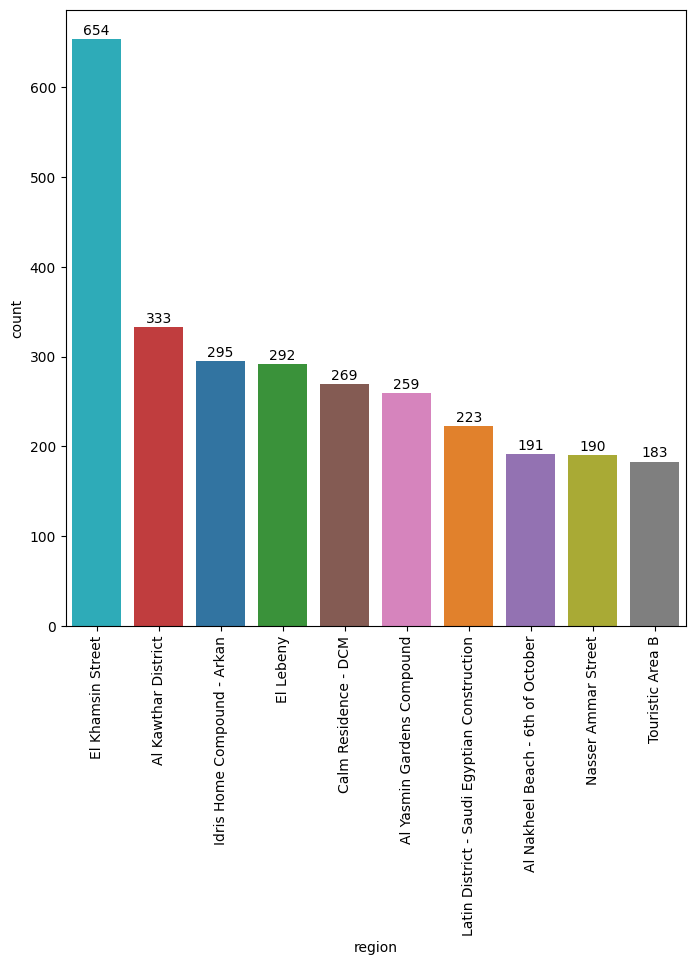

In [34]:

ind=df.region.value_counts().index[:10]

new_dataframe=df[df.region.isin(ind)]

bar_func(col='region',dataframe=new_dataframe)


<span style="color:turquoise; font-size:60px; font-weight:bold;"> 5-  area</span>

In [35]:
df.area.unique()

array(['96 متر²', '230 متر²', '160 متر²', ...,
       "[' المساحات ', ' ', '67 متر²', 'مول فيرتي بيزنس تاور العاصمة الإدارية الجديدة.', ' ', ' ', '\\n##موقع كمبوند فالنسيا فالي القاهرة الجديدة', ' ', '\\nيتميز كمبوند فالنسيا فالي القاهرة الجديدة بموقعه المنفرد والمتميز في التجمع الخامس، حيث يقع بالقرب من المعالم الحيوية وشبكة الطرق الرئيسية للقاهرة الجديدة، مما يسهل وصول السكان إلى مختلف مناطق المدينة. ويقع الكمبوند أيضًا بالقرب من منطقة المدارس والجامعات، مما يتيح للسكان الاستفادة من جميع الخدمات التعليمية بجوار الكمبوند. ويقع الكمبوند بالقرب من كمبوند هايد بارك وطريق العين السخنة والطريق الدائري الأوسطي، مما يجعله موقعًا مركزيًا ومناسبًا للعيش فيه.', ' ', '\\n###المناطق والطرق القريبة من مشروع فالنسيا فالي:', ' ', '\\nيبعد 2 دقيقة عن كمبوند هايد بارك ومحطة المونوريل.', '\\nقريب جدًا من طريق التسعين الجنوبي ومحور محمد نجيب.', '\\nيبعد 5 دقائق عن الجامعة الأمريكية.', '\\n3 دقائق فقط بين المشروع وطريق العين السخنة.', '\\nالكمبوند علي بعد 15 دقيقة من طريق السويس.', '\\nأقل من 20 دقيقة بي

In [36]:
# Extract numeric area values from text (e.g., '120 متر' → '120')
df['area'] = df['area'].str.extract('(\d+)', expand=False)

# Show unique cleaned area values
df.area.unique()


array(['96', '230', '160', '300', '110', '69', '200', '170', '130', '500',
       '93', '166', '76', '138', '72', '155', '64', '147', '98', '185',
       '114', '196', '107', '55', '80', '281', '154', '174', '150', '168',
       '124', '88', '255', '180', '178', '134', '305', '157', '188',
       '165', '86', '210', '57', '85', '199', '240', '163', '149', '194',
       '127', '220', '350', '116', '140', '126', '141', '193', '156',
       '192', '171', '162', '217', '167', '203', '172', '112', '164',
       '161', '45', '176', '191', '58', '33', '63', '143', '109', '60',
       '62', '120', '135', '100', '101', '145', '201', '142', '225',
       '190', '132', '90', '47', '181', '115', '68', '105', '244', '259',
       '56', '106', '46', '49', '78', '247', '83', '360', '148', '152',
       '139', '125', '265', '270', '239', '122', '84', '74', '182', '65',
       '186', '123', '119', '158', '128', '151', '195', '284', '205',
       '320', '215', '208', '91', '450', '77', '251', '250', '26

In [37]:
df.area.isna().sum()

np.int64(0)

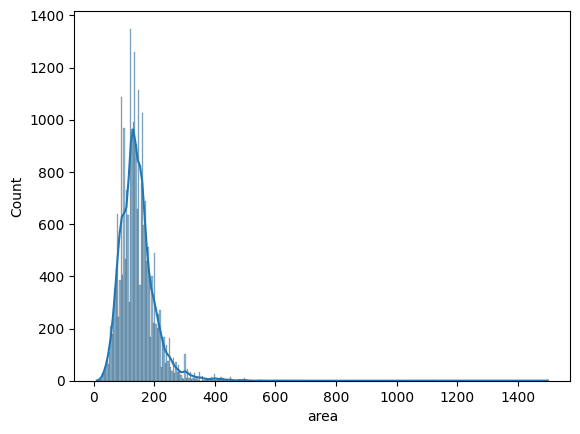

In [38]:
df.area=df.area.astype(int)
sns.histplot(data=df, x='area',kde=True)
plt.show()

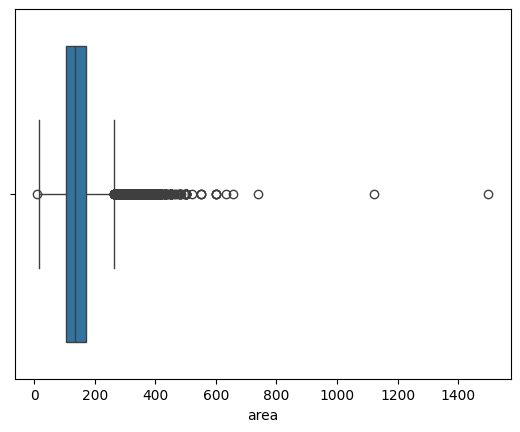

In [39]:
sns.boxplot(data=df , x='area' )
plt.show()

In [40]:
df.loc[df.area==1500,'area']=150
df.loc[df.area==1122,'area']=122


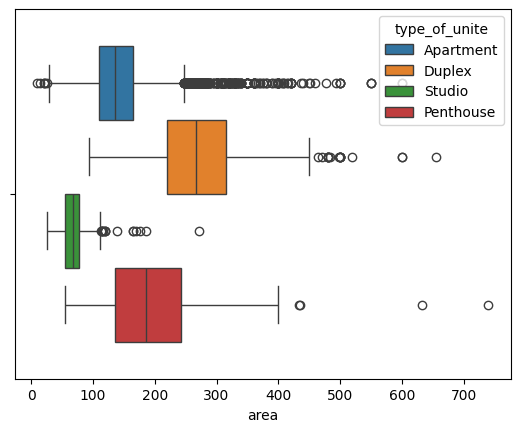

In [41]:
sns.boxplot(data=df , x='area' ,hue='type_of_unite')
plt.show()

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 6-  rooms</span>

In [42]:
df.rooms.unique()

array(['2 غرف', '4 غرف', '3 غرف', '6 غرف', '1 غرف', nan, '5 غرف',
       "[' الغرف ', ' ', '2']", "[' الغرف ', ' ', '1']", '[]',
       "[' الغرف ', ' ', '3']", "[' الغرف ', ' ', '5']", '8 غرف', '7 غرف',
       "[' الغرف ', ' ', '4']", 'نصف تشطيب', "[' الغرف ', ' ', '7']",
       "[' الغرف ', ' ', '6']", '90 غرف',
       "[' الغرف ', ' ', '1', 'نيوم أسيوط.', ' ', ' ', '\\n##موقع منتجع سيا مطروح', ' ', '\\nيقع منتجع سيا مطروح بالقرب من مطار مرسى مطروح على بعد دقائق فقط، لذلك يُفضل الكثير من الباحثين عن مكان راقي ومميز يجمع بين الكثير من الخدمات الإقامة في قرية سيا مطروح نظرًا لموقعه المتميز بالقرب من المطار، كما أن المنتجع يقع على بُعد 2 كيلومتر من شاطئ كليوباترا الشهير وعلى بُعد 16 كيلومترًا من شاطئ عجيبة وعلى بُعد 5 دقائق فقط من شاطئ الغرام وشارع اسكندرية المليء بالمحلات والمطاعم والكافيهات وغيرها.', ' ', ' ', '\\n###المدن والطرق الرئيسية القريبة من قرية سيا مطروح', ' ', '\\nيقترب منتجع سيا مطروح من طريق إسكندرية – مطروح بالإضافة إلى قربه من مطار مرسى مطروح مما جعل الإقبال على المنتجع

In [43]:
df[df['rooms']=='نصف تشطيب'].head(2)

ad_id            owner_type  \
2307  EG-6015986  Real Estate Marketer   
5755  EG-5981422  Real Estate Marketer   

                                               ad_title  \
2307                MH شقه 198م بجوار جامعه زويل مباشرا   
5755  MH شقه 158م في اميز لوكيشن كمبوند في شارع زويل...   

                                             location  area      rooms  \
2307  ['القاهرة الكبرى  /  كمبوند ادريس هوم - أركان']   198  نصف تشطيب   
5755  ['القاهرة الكبرى  /  كمبوند ادريس هوم - أركان']   158  نصف تشطيب   

     bathrooms finish_status floor_number year_of_building  \
2307       NaN           NaN            2             2028   
5755       NaN           NaN            2             2028   

                              views  payment_method total_reviews  \
2307  ['تطل على', 'الشارع الرئيسي']  نقداً أو تقسيط           5.8   
5755  ['تطل على', 'الشارع الرئيسي']  نقداً أو تقسيط           5.8   

     region_rating schools_rating services quietness location_rating  \
2307           6.0            6.0      6.0       9.0             4.0   
5755           6.0            6.0      6.0       9.0             4.0   

     transportation_rating markets_rating  \
2307                   4.0            5.0   
5755                   4.0            5.0   

                                            description  \
2307  ['وصف الإعلان', 'شقتك ١٩٨ متر فى اقوي لوكيشن ف...   
5755  ['وصف الإعلان', 'شقتك 158 متر فى كمبوند متكامل...   

                                                   link   price_per_meter  \
2307  https://aqarmap.com.eg/ar/listing/6015986-for-...  29,000 جنيه/متر²   
5755  https://aqarmap.com.eg/ar/listing/5981422-for-...  29,000 جنيه/متر²   

                    price type_of_unite  in_compound           city  \
2307  5,742,000\n    جنيه     Apartment            1  Greater Cairo   
5755  4,582,000\n    جنيه     Apartment            1  Greater Cairo   

                           region  
2307  Idris Home Compound - Arkan  
5755  Idris Home Compound - Arkan

In [44]:
# Fix data leakage: some entries in 'rooms' contain finishing status like 'نصف تشطيب'

# Move incorrect 'finish_status' values from 'rooms' column to the correct column
df.loc[df['rooms'] == 'نصف تشطيب', 'finish_status'] = 'نصف تشطيب'

# Replace the invalid 'rooms' value with NaN
df.loc[df['rooms'] == 'نصف تشطيب', 'rooms'] = np.nan

# Extract numeric digits from 'rooms' values (e.g., '3 غرف' → 3)
df.rooms = df.rooms.str.extract('(\d+)', expand=False)

# Show unique cleaned room values
df.rooms.unique()


array(['2', '4', '3', '6', '1', nan, '5', '8', '7', '90', '01', '41', '9',
       '100', '64'], dtype=object)

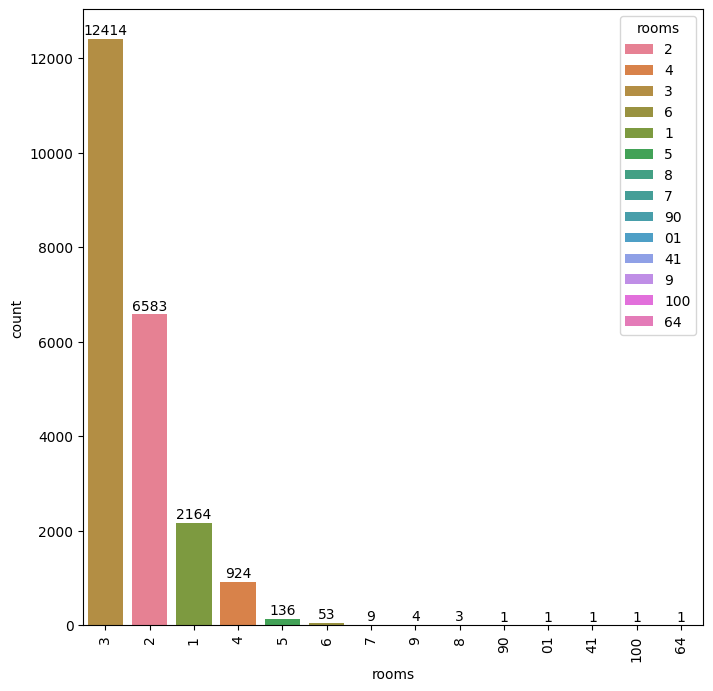

In [45]:
bar_func('rooms')

In [46]:
sam_col=df[df.rooms.astype(float)==9].index[1:]
df.drop(index=sam_col ,inplace=True)

In [47]:
df[df.rooms.astype(float)>=10]

ad_id            owner_type  \
9099   EG-6031134  Real Estate Marketer   
12492  EG-5516752  Real Estate Marketer   
17265  EG-5523866        Property Owner   
20389  EG-5807396  Real Estate Marketer   

                                                ad_title  \
9099                                       شقه للبيع 90م   
12492  شقتك بارقي احياء اكتوبر ببيت الوطن الحي التاسع...   
17265                                 الحي الرابع العبور   
20389  بنتهاوس للبيع في كمبوند صفوة الأندلس خلف الجام...   

                                           location  area rooms bathrooms  \
9099                  ['القليوبية  /  شبرا الخيمة']    90    90    1 حمام   
12492  ['القاهرة الكبرى  /  بيت الوطن الحي التاسع']   247    41    3 حمام   
17265            ['القاهرة الكبرى  /  الحي الرابع']   215   100  100 حمام   
20389           ['القاهرة الكبرى  /  صفوة ريزيدنس']   300    64    3 حمام   

          finish_status floor_number year_of_building  \
9099          سوبر لوكس            3             2020   
12492         نصف تشطيب            1             2024   
17265        بدون تشطيب            3             2025   
20389  اكسترا سوبر لوكس            3             2025   

                               views  payment_method total_reviews  \
9099   ['تطل على', 'الشارع الرئيسي']           نقداً           NaN   
12492           ['تطل على', 'ناصيه']  نقداً أو تقسيط           NaN   
17265           ['تطل على', 'حديقة']  نقداً أو تقسيط           NaN   
20389           ['تطل على', 'حديقة']           نقداً           8.7   

      region_rating schools_rating services quietness location_rating  \
9099            NaN            NaN      NaN       NaN             NaN   
12492           NaN            NaN      NaN       NaN             NaN   
17265           NaN            NaN      NaN       NaN             NaN   
20389            10            9.0      9.0       9.0             6.0   

      transportation_rating markets_rating  \
9099                    NaN            NaN   
12492                   NaN            NaN   
17265                   NaN            NaN   
20389                   5.0             10   

                                             description  \
9099   ['وصف الإعلان', 'شقه للبيع تاتش سكرين عماره 90...   
12492  ['وصف الإعلان', 'شقتك بارقي احياء اكتوبر ببيت ...   
17265  ['وصف الإعلان', 'نص روف ٢١٥ متر للبيع في الحي ...   
20389  ['وصف الإعلان', 'بنتهاوس للبيع في كمبوند صفوة ...   

                                                    link   price_per_meter  \
9099   https://aqarmap.com.eg/ar/listing/6031134-for-...   5,444 جنيه/متر²   
12492  https://aqarmap.com.eg/ar/listing/5516752-for-...  14,008 جنيه/متر²   
17265  https://aqarmap.com.eg/ar/listing/5523866-for-...   5,116 جنيه/متر²   
20389  https://aqarmap.com.eg/ar/listing/5807396-for-...  20,000 جنيه/متر²   

                     price type_of_unite  in_compound           city  \
9099     490,000\n    جنيه     Apartment            0       Qalyubia   
12492  3,460,000\n    جنيه     Apartment            0  Greater Cairo   
17265  1,100,000\n    جنيه     Apartment            0  Greater Cairo   
20389  6,000,000\n    جنيه     Penthouse            1  Greater Cairo   

                           region  
9099                  شبرا الخيمة  
12492  Beit Al Watan - District 9  
17265                 الحي الرابع  
20389                صفوة ريزيدنس

In [48]:
df.loc[df.rooms.astype(float)==90 , 'rooms']='2'
df.loc[df.rooms.astype(float)==41 , 'rooms']=np.nan
df.loc[df.rooms.astype(float)==100 , 'rooms']=np.nan
df.loc[df.rooms.astype(float)==64 , 'rooms']='4'
df.rooms=df.rooms.replace({'01':'1'})

In [49]:
df.rooms.unique()

array(['2', '4', '3', '6', '1', nan, '5', '8', '7', '9'], dtype=object)

In [50]:
df.rooms.value_counts()

rooms
3    12414
2     6584
1     2165
4      925
5      136
6       53
7        9
8        3
9        1
Name: count, dtype: int64

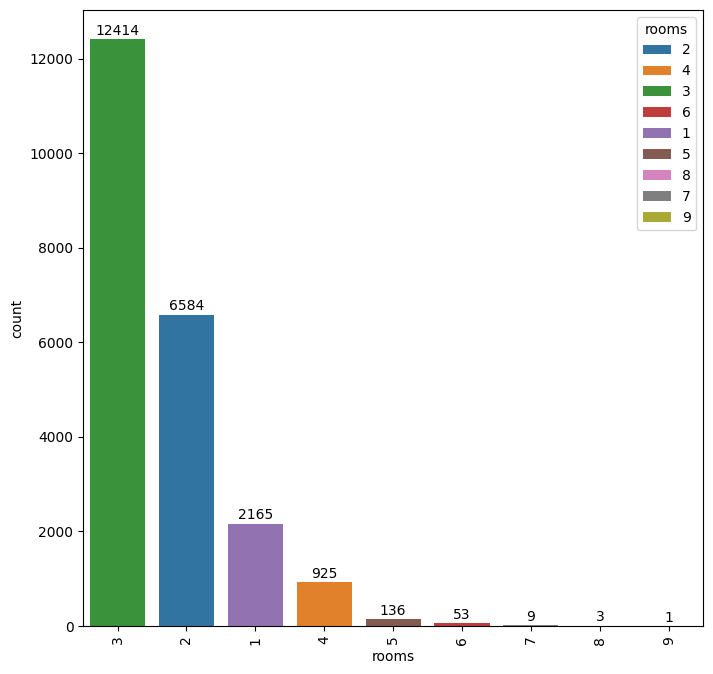

In [51]:
bar_func('rooms')

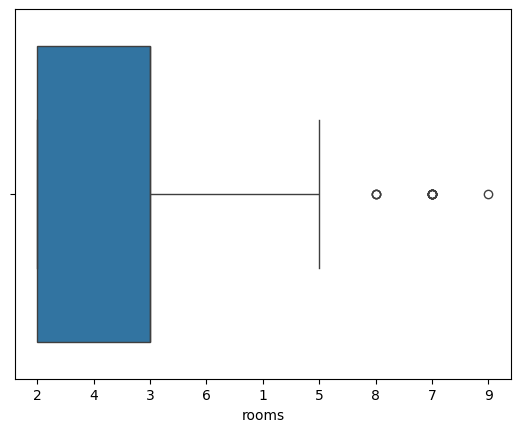

In [52]:
sns.boxplot(data=df , x='rooms')
plt.show()

<span style="color:turquoise; font-size:60px; font-weight:bold;">7-  bathrooms</span>

In [53]:
df.bathrooms.unique()

array(['2 حمام', '3 حمام', '1 حمام', '5 حمام', nan, '4 حمام', '6 حمام',
       '[]',
       "['إنشاء وإدارة المولات التجارية', '\\nنحافظ على سمعتنا من خلال نقل نجاحنا إلى خطوط أعمال أخرى ، بناءً على إستراتيجية شركتنا لتأمين مزيد من النمو والاستمرار في تقديم مفاهيم فنية. وراء هذه الاستراتيجية ، فريق من ذوي الخبرة العالية والمواهب المختصة الملتزمين بضمان تحقيق هذا المعيار من خلال التحسين المستمر والابتكار ، وبالتالي ضمان الثقة المتبادلة والنجاح على المدى الطويل.', ' ', '\\n##مميزات مشروع قرية ذا واتر واي الساحل الشمالي ', ' ', '\\nقرية ذا واتر واي الساحل الشمالي من القرى التي يُمكننا أن نعد مُميزاتها الكثيرة ومنها:', ' ', '\\nاستغلال المساحة الأكبر من القرية للاند سكيب والمسطحات المائية والبحيرات الصناعية مما يجعل المكان مُريحًا نفسيًا ويُساعد على الاسترخاء.', '\\nفخامة وُرقي الوحدات المصيفية وتشطيبها سوبر لوكس ليستلمها العُملاء جاهزة للسكن.', '\\nموقع القرية الذي يقع على أفضل شواطئ الساحل الشمالي وبالقرب من أهم وأرقى الأماكن الموجودة هناك.', '\\nمنتجع متكامل الخدمات يوفر للعملاء الهدوء 

In [54]:
df.bathrooms=df.bathrooms.str.extract('(\d+)',expand=False)
df.bathrooms.unique()

array(['2', '3', '1', '5', nan, '4', '6', '70', '٤', '350', '180', '20',
       '0', '84', '13', '100', '8', '7'], dtype=object)

In [55]:
df.loc[df.bathrooms=='٤','bathrooms']='4'


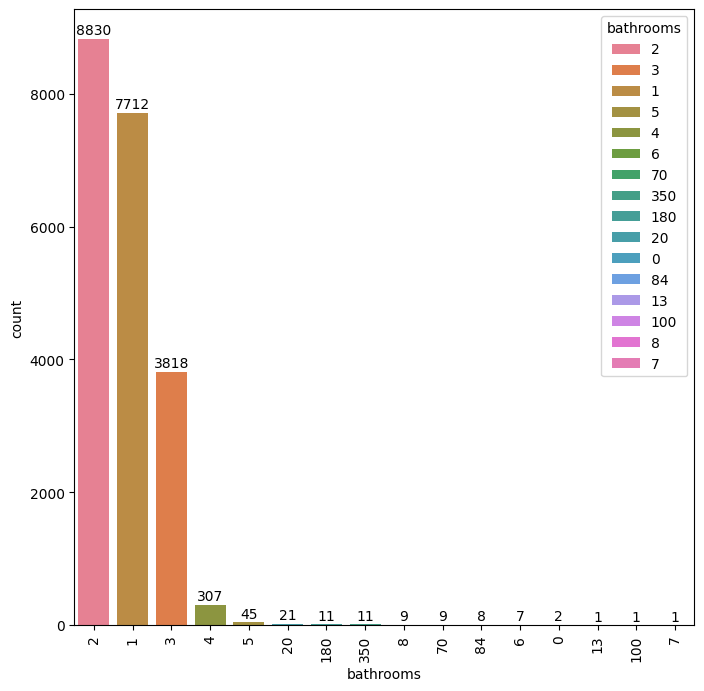

In [56]:
bar_func('bathrooms')

In [57]:
df.loc[(df.bathrooms.astype(float)>=7)|(df.bathrooms.astype(float)==0),'bathrooms'] = np.nan

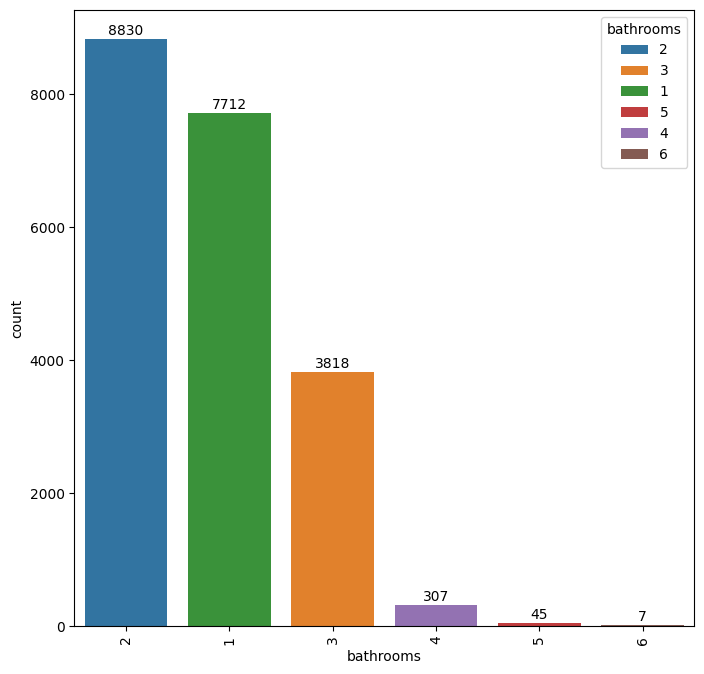

In [58]:
bar_func('bathrooms')

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 8-  finish_status</span>

In [59]:
df.finish_status.unique()

array(['نصف تشطيب', 'سوبر لوكس', 'اكسترا سوبر لوكس', 'بدون تشطيب', 'لوكس',
       nan, "[' نوع التشطيب', ' ', 'اكسترا سوبر لوكس']",
       "[' نوع التشطيب', ' ', 'بدون تشطيب']",
       "[' نوع التشطيب', ' ', 'نصف تشطيب']",
       "[' نوع التشطيب', ' ', 'نصف تشطيب', 'الطريق الدائري الإقليمي، وطريق عين السخنة.', ' ', ' ', '\\n##الوحدات الموجودة في كمبوند زيزينيا المستقبل سيتي', ' ', '\\nتختلف أنواع الوحدات السكنية لتلبي جميع متطلبات الأسر، والفرق بين الوحدات السكنية كالآتي:', ' ', '\\n###البنتهاوس في كمبوند زيزينيا المستقبل سيتي', ' ', '\\nهي شقة في الدور الأخير من المبنى السكني، وتمتاز بوجود مساحة أمامها يمكن استغلالها لعمل تراس أو حمام سباحة، وتتميز بانخفاض سعرها مقارنة بالفيلات، ويتمتع سكانها بالإطلالات والهواء النقي والخصوصية.', ' ', '\\n###الشقق في كمبوند زيزينيا المستقبل سيتي', ' ', '\\nتتكون من غرفة نوم أو أكثر تبعًا لمساحتها، وتناسب جميع الأفراد، ويختلف سعرها باختلاف المساحة والتشطيبات الداخلية والدور الذي تقع فيه.', ' ', '\\n###الدوبلكس بزيزينيا المستقبل سيتي', ' ', '\\nهي شقتين

In [60]:
# Clean the 'finish_status' column by extracting the correct standard category
# If one of the expected finish levels is found in the text, return it

v = ['بدون تشطيب', 'نصف تشطيب', 'اكسترا سوبر لوكس', 'سوبر لوكس', 'لوكس']

def finish_func(x):
    for i in v:
        if i in str(x):  # Ensure x is treated as string
            return i
    return x  # Return original value if no match found

# Apply cleaning function to the column
df.finish_status = df.finish_status.apply(finish_func)

# Display unique cleaned values
df.finish_status.unique()


array(['نصف تشطيب', 'سوبر لوكس', 'اكسترا سوبر لوكس', 'بدون تشطيب', 'لوكس',
       nan], dtype=object)

In [61]:
# Translate 'finish_status' values from Arabic to English using a mapping dictionary

translate_map = {
    'بدون تشطيب': 'Unfinished',
    'نصف تشطيب': 'Semi-Finished',
    'لوكس': 'Luxury',
    'سوبر لوكس': 'Super Luxury',
    'اكسترا سوبر لوكس': 'Extra Super Luxury'
}

# Apply the translations
df['finish_status'] = df['finish_status'].replace(translate_map)

# Show unique translated values
df.finish_status.unique()


array(['Semi-Finished', 'Super Luxury', 'Extra Super Luxury',
       'Unfinished', 'Luxury', nan], dtype=object)

In [62]:
df.finish_status.value_counts(dropna=False)

finish_status
Semi-Finished         8133
Super Luxury          6366
Extra Super Luxury    4817
Unfinished            3099
Luxury                1044
NaN                    229
Name: count, dtype: int64

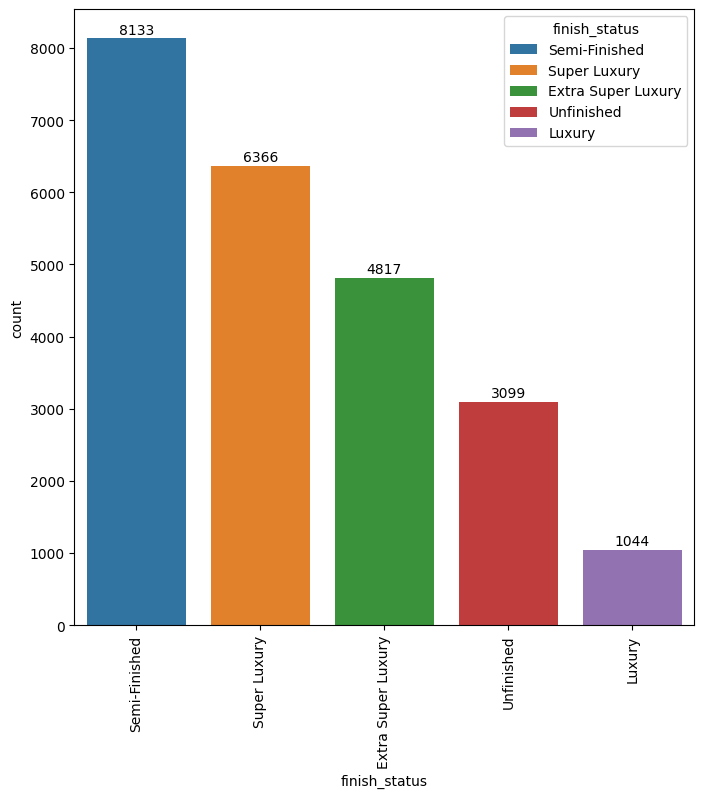

In [63]:
bar_func('finish_status')

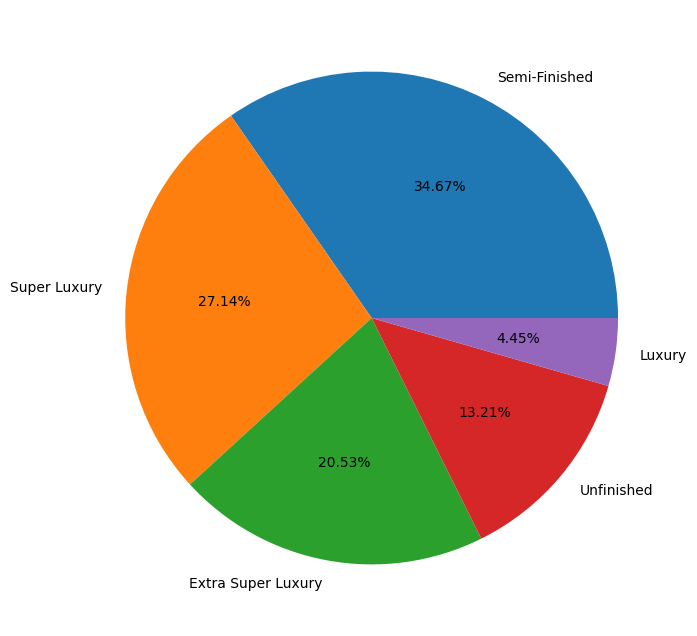

In [64]:
pie_func('finish_status')

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 9-  floor_number</span>

In [65]:
df.floor_number.unique()

array(['2', '11', 'الارضي', '1', '4', '3', '6', '5', '12', '8', '7', '[]',
       '10', '15', '9', '13', "['الدور', ' ', '7']",
       "['الدور', ' ', 'الارضي']", "['الدور', ' ', '1']",
       "['ماكينات الصرف الآلي.', ' ', ' ', '\\n##سعر المتر في مشروع كمبوند نايل بوليفارد القاهرة الجديدة', ' ', '\\nيختلف سعر المتر في كمبوند نايل بوليفارد وذلك وفقًا لعدة متغيرات وهي نوع الوحدة السكنية، ومساحتها، وموقعها في المشروع، والدور الذي تقع به، وأيضًا وفقًا لمتغيرات السوق العقاري، لذلك يمكنك متابعة الجدول الدوري المحدث من قِبل عقارماب لمعرفة اّخر تطورات سعر السوق.', ' ', ' ', '\\n###أنظمة الدفع والسداد في كمبوند نايل بوليفارد التجمع الخامس', ' ', '\\nحرصت الشركة المنفذة للمشروع على توفير طرق سداد مُريحة ومناسبة لمختلف العملاء وذلك عن طريق دفع:', ' ']",
       "['الدور', ' ', '5']", "['الدور', ' ', '2']", '14', '16',
       "['الدور', ' ', '4']", "['الدور', ' ', '6']",
       "['الدور', ' ', '3']", "['الدور', ' ', '8']", '22',
       "['الدور', ' ', '12']", "['الدور', ' ', '11']",
       "['الدو

In [66]:
v=[f"'{i}'" for i in range(1,30)]
v.append('الارضي')
def floor_func(x):
    for i  in v:
        if i in str(x):
            return i.replace("'",'')
    if len(x.split(','))>3  or x=='[]':
        return np.nan
    return x
df.floor_number=df.floor_number.apply(floor_func)
df.floor_number.unique()

array(['2', '11', 'الارضي', '1', '4', '3', '6', '5', '12', '8', '7', nan,
       '10', '15', '9', '13', '14', '16', '22', '02', '20', '17', '19',
       '18', '24', '26', '27', '01', '110'], dtype=object)

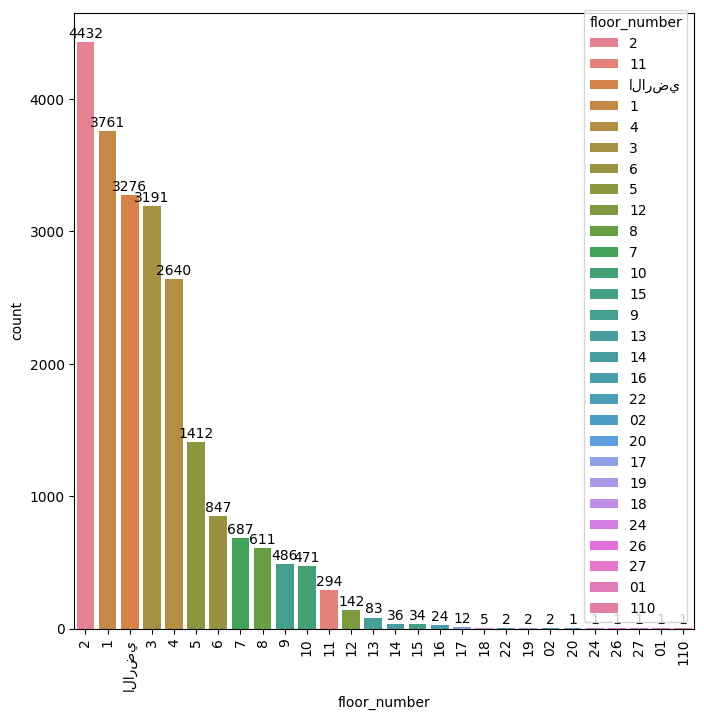

In [67]:
bar_func('floor_number')

In [68]:
27%20

7

In [69]:
# Clean and normalize values in the 'floor_number' column

# Fix common formatting issues
df.loc[df.floor_number == '110', 'floor_number'] = '10'
df.loc[df.floor_number == '01', 'floor_number'] = '1'
df.loc[df.floor_number == 'الارضي', 'floor_number'] = '0'
df.loc[(df.floor_number == '02') | (df.floor_number == '20'), 'floor_number'] = '2'

# For values greater than 20, apply modulo 20 to reduce unrealistic floor numbers
df.loc[df.floor_number.astype(float) > 20, 'floor_number'] = (
    df[df.floor_number.astype(float) > 20]['floor_number'].astype('int') % 20
)



In [70]:
df.floor_number.unique()

array(['2', '11', '0', '1', '4', '3', '6', '5', '12', '8', '7', nan, '10',
       '15', '9', '13', '14', '16', 2, '17', '19', '18', 4, 6, 7],
      dtype=object)

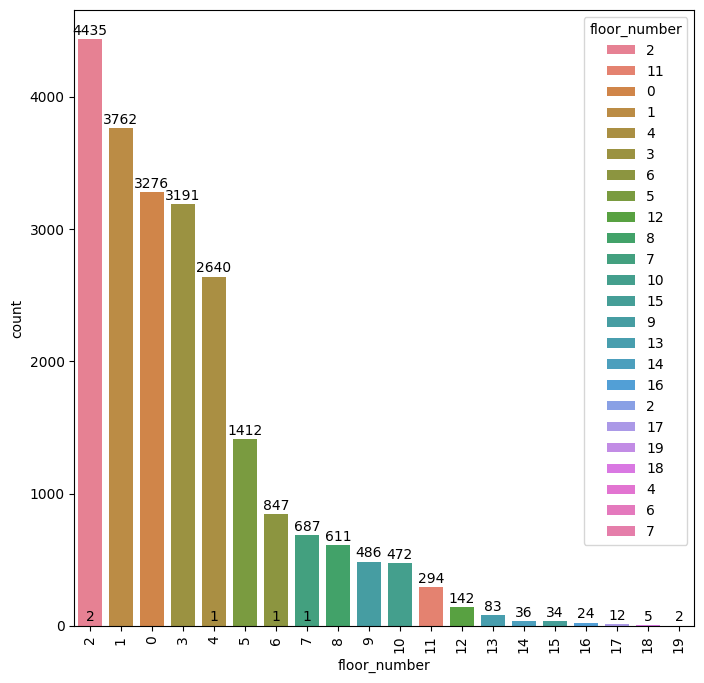

In [71]:
bar_func('floor_number')

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 10-  year_of_building</span>

In [72]:
df.year_of_building.unique()

array(['2028', '2025', '2027', '2020', '2026', '2023', '2021', '2022',
       '2024', '[]', '2018', '2002', '1989', '2019', '1998', '1986',
       '1999', '2029', '2000', '2011', '2013', '2004', '2008', '2005',
       '1996', '1991', '1985', "[' سنة البناء / التسليم ', ' ', '2025']",
       "[' سنة البناء / التسليم ', ' ', '2030']",
       "[' سنة البناء / التسليم ', ' ', '2027']",
       "[' سنة البناء / التسليم ', ' ', '2028']",
       "[' سنة البناء / التسليم ', ' ', '2029']",
       "[' سنة البناء / التسليم ', ' ', '2023']",
       "[' سنة البناء / التسليم ', ' ', '2026']", '2030',
       "[' سنة البناء / التسليم ', ' ', '2026', 'التسليم الفوري: إمكانية الحصول على وحدة سكنيةفي كمبوند سراي طريق السويس بشكل فوري.', ' ', '\\nهذه الأنظمة تجعل من كمبوند سراى التجمع الخامس خيارًا ممتازًا للراغبين في الاستثمار العقاري والبحث عن السكن الراقي في القاهرة الجديدة.', ' ', ' ', '\\n##فوائد الاستثمار داخل كمبوند سراى التجمع الخامس', ' ', '\\nاستثمارك العقاري في كمبوند سراى التجمع الخامس، يمكن أن

In [73]:
z=[f'{i}' for i in range(1900,2100)]
def year_func(x):
    for i  in z:
        if i in str(x):
            return i.replace("'",'')
    if x=='[]':
        return np.nan
    return x
df.year_of_building=df.year_of_building.apply(year_func )
df.year_of_building.unique()

array(['2028', '2025', '2027', '2020', '2026', '2023', '2021', '2022',
       '2024', nan, '2018', '2002', '1989', '2019', '1998', '1986',
       '1999', '2029', '2000', '2011', '2013', '2004', '2008', '2005',
       '1996', '1991', '1985', '2030', '1990', '2010', '2017', '1987',
       '2015', '1994', '2016', '1975', '2014', '1970', '1997', '2007',
       '1995', '1980', '2006', '1907', '2012', '2009', '2003', '1984',
       '1992', '2001', '1969', '1973', '1988', '2043', '1982', '1960',
       '2037', '1983', '1900', '2044', '1993', '1981', '1953', '1971',
       '1978', '1950', '1977', '2034', '1943', '1967', '1956', '1939',
       '1976', '1964', '2035', '1962', '1965', '1961', '1903', '1974',
       '2031', '1957'], dtype=object)

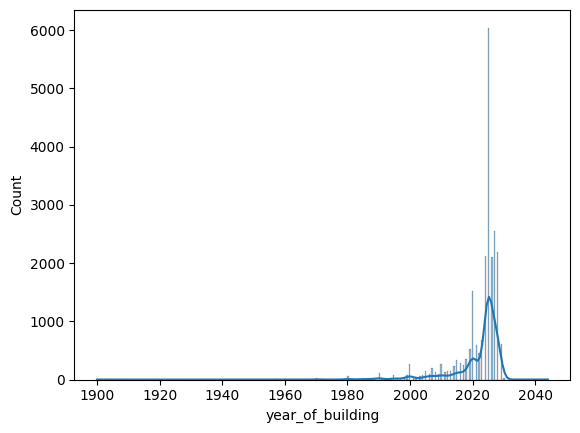

In [74]:
sns.histplot(x=df.year_of_building.astype(float),kde=True)
plt.show()

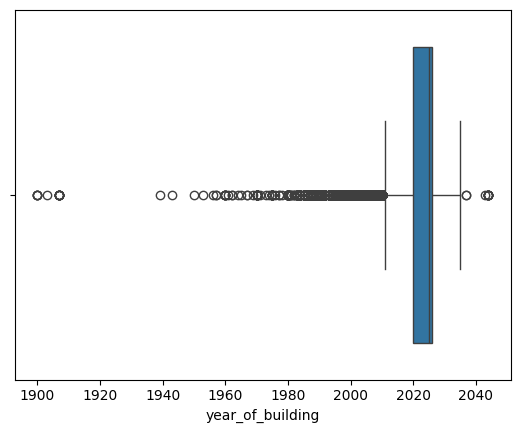

In [75]:
sns.boxplot(x=df.year_of_building.astype(float))
plt.show()

In [76]:
df.loc[df.year_of_building.astype(float)==2031,'year_of_building']='2024'

In [77]:
df[df.year_of_building.astype(float)>=2031]['year_of_building'].unique()

array(['2043', '2037', '2044', '2034', '2035'], dtype=object)

In [78]:
# Fix incorrect future years (greater than 2031) in 'year_of_building'
# The logic: replace the third character in the year string with '2'
# Example: '2135' → '2015'

def date_func(x):
    x = list(x)     # Convert string to list of characters
    x[2] = '2'      # Replace the third digit (zero-indexed)
    return ''.join(x)  # Join back into string

# Apply correction to entries where year >= 2031
df.loc[df.year_of_building.astype(float) >= 2031, 'year_of_building'] = \
    df[df.year_of_building.astype(float) >= 2031]['year_of_building'].apply(date_func)


In [79]:
df.loc[df.year_of_building.astype(float)<=1920,'year_of_building']=np.nan

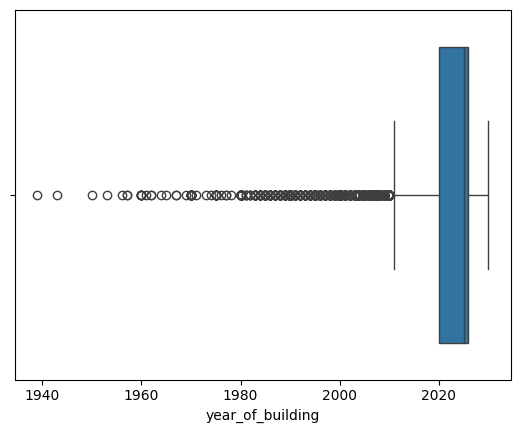

In [80]:
sns.boxplot(x=df.year_of_building.astype(float))
plt.show()

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 11-  views</span>

In [81]:
df.views.unique()

array(["['تطل على', 'الشارع الرئيسي']", "['تطل على', 'ناصيه']",
       "['تطل على', 'حديقة']", "['تطل على', 'الشارع الجانبي']",
       "['تطل على']", '[]', "['تطل على', 'حمام السباحة']",
       "['تطل على', 'أخرى']", "['تطل على', 'إطلالة على البحر']",
       "['تطل على', 'الجهة الخلفية']", "['تطل على', 'إطلالة على النيل']",
       "['تطل على', 'ملعب الجولف']", "['  تطل على ', ' ', 'شارع رئيسي']",
       "['  تطل على ', ' ', 'البحر']", "['  تطل على ', ' ', 'حديقة']",
       "['  تطل على ', ' ', 'خلفي']", "['  تطل على ', ' ', 'نادى']",
       "['  تطل على ', ' ', 'حمام سباحة']", "['  تطل على ', ' ', 'جولف']",
       "['  تطل على ', ' ', 'حديقة', 'الطريق الدائري الإقليمي، وطريق عين السخنة.', ' ', ' ', '\\n##الوحدات الموجودة في كمبوند زيزينيا المستقبل سيتي', ' ', '\\nتختلف أنواع الوحدات السكنية لتلبي جميع متطلبات الأسر، والفرق بين الوحدات السكنية كالآتي:', ' ', '\\n###البنتهاوس في كمبوند زيزينيا المستقبل سيتي', ' ', '\\nهي شقة في الدور الأخير من المبنى السكني، وتمتاز بوجود مساحة أمامها يمك

In [82]:
z=['الشارع الرئيسي', 'ناصيه', 'حديقة', 'الشارع الجانبي', 'حمام السباحة', 'إطلالة على البحر',
       'الجهة الخلفية', 'إطلالة على النيل',
       'شارع رئيسي', 'البحر', 'خلفي', 'نادى','نادي' ,'حمام سباحة', 'جولف','بحيرة',"بلازا","شارع فرعي","أخرى"]
def views_func(x):
    for i  in z:
        if i in str(x):
            return i
        if x=='[]':
            return np.nan
    return x
df.views=df.views.apply(views_func)
df.views.unique()

array(['الشارع الرئيسي', 'ناصيه', 'حديقة', 'الشارع الجانبي',
       "['تطل على']", nan, 'حمام السباحة', 'أخرى', 'إطلالة على البحر',
       'الجهة الخلفية', 'إطلالة على النيل', 'جولف', 'شارع رئيسي', 'البحر',
       'خلفي', 'نادى', 'حمام سباحة', 'بحيرة', 'بلازا', 'شارع فرعي',
       'نادي'], dtype=object)

In [83]:
df.loc[df.views=="['تطل على']",'views']='بحيرة'
df.views.unique()

array(['الشارع الرئيسي', 'ناصيه', 'حديقة', 'الشارع الجانبي', 'بحيرة', nan,
       'حمام السباحة', 'أخرى', 'إطلالة على البحر', 'الجهة الخلفية',
       'إطلالة على النيل', 'جولف', 'شارع رئيسي', 'البحر', 'خلفي', 'نادى',
       'حمام سباحة', 'بلازا', 'شارع فرعي', 'نادي'], dtype=object)

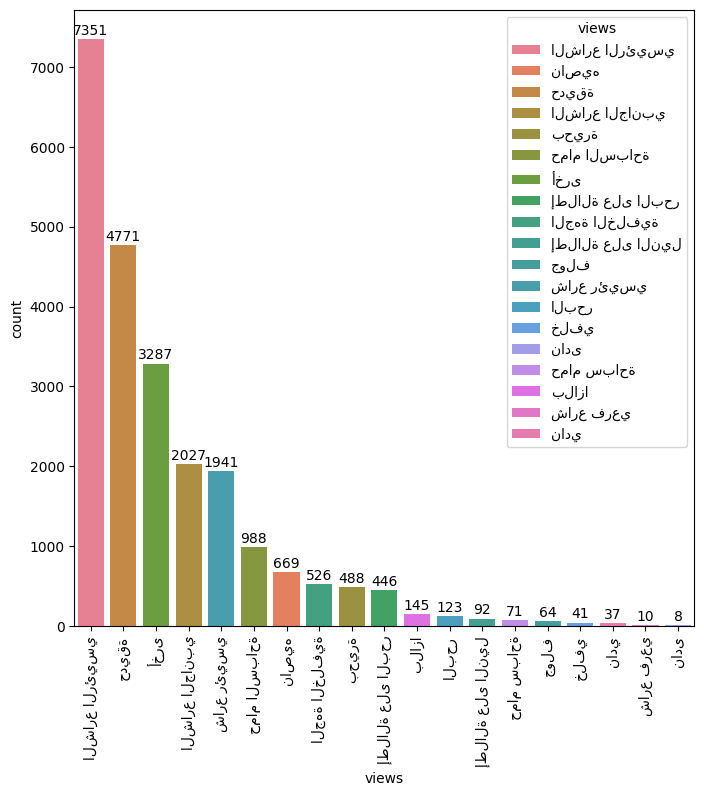

In [84]:
bar_func('views')

In [85]:
view_dict={'شارع رئيسي':'الشارع الرئيسي',
            'خلفي' : 'الجهة الخلفية' ,
            'إطلالة على البحر':'البحر' ,
            'حمام سباحة':'حمام السباحة',
            'نادى':'نادي',
            'أخرى':np.nan}
df.views=df.views.replace(view_dict)

df.views.unique()

array(['الشارع الرئيسي', 'ناصيه', 'حديقة', 'الشارع الجانبي', 'بحيرة', nan,
       'حمام السباحة', 'البحر', 'الجهة الخلفية', 'إطلالة على النيل',
       'جولف', 'نادي', 'بلازا', 'شارع فرعي'], dtype=object)

In [86]:
# Translate Arabic view descriptions to English using a predefined dictionary

view_dict_new = {
    'الشارع الرئيسي': 'Main Street',
    'ناصيه': 'Corner',
    'حديقة': 'Garden',
    'الشارع الجانبي': 'Side Street',
    'بحيرة': 'Lake',
    'حمام السباحة': 'Swimming Pool',
    'البحر': 'Sea',
    'الجهة الخلفية': 'Back Side',
    'إطلالة على النيل': 'Nile View',
    'جولف': 'Golf',
    'نادي': 'Club',
    'بلازا': 'Plaza',
    'شارع فرعي': 'Secondary Street'
}

# Apply the mapping to the 'views' column
df.views = df.views.replace(view_dict_new)

# Display value counts after translation
df.views.value_counts()


views
Main Street         9292
Garden              4771
Side Street         2027
Swimming Pool       1059
Corner               669
Sea                  569
Back Side            567
Lake                 488
Plaza                145
Nile View             92
Golf                  64
Club                  45
Secondary Street      10
Name: count, dtype: int64

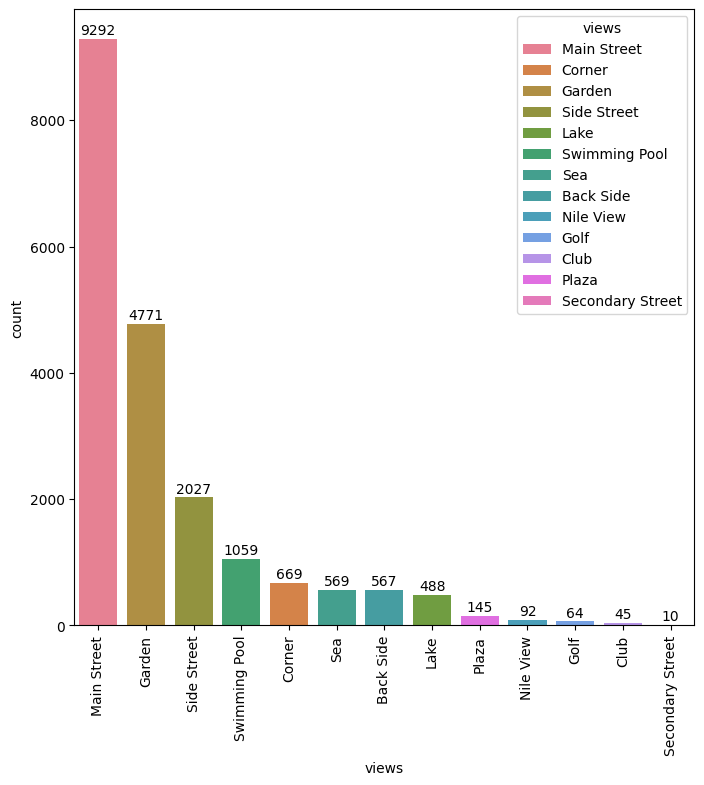

In [87]:
bar_func('views')

<span style="color:turquoise; font-size:60px; font-weight:bold;"> 12-  payment_method</span>

In [88]:
df.payment_method.unique()

array(['نقداً أو تقسيط', 'نقداً', 'تقسيط',
       "['  طريقة الدفع ', ' ', 'نقداً أو تقسيط']", '[]',
       "['  طريقة الدفع ', ' ', 'نقداً أو تقسيط', 'مونوريل تاور العاصمة الإدارية الجديدة', ' ', ' ', '\\n##موقع كمبوند رايت العاصمة الادارية', ' ', '\\nيقع كمبوند رايت العاصمة الإدارية الجديدة في موقع مميز جدا في منطقة R8 الحي الثاني وعلى مقربة من المحور الجنوبي لمدينة بن زايد، وصُمم المشروع على حسب الموقع الخاص به، حيث أراد المطور أن يجمع بين الخدمات المتوفرة حول رايت كمبوند العاصمة الإدارية وطريقة تصميمه من حيث الشكل المعماري، ولذلك نفذ المشروع على محور بن زايد الجنوبي.  ', ' ', ' ', '\\n###المدن والطرق الرئيسية القريبة من رايت', ' ', '\\nالحي الحكومي، حيث يبعد عنه مسافة 10 دقائق فقط بالسيارة.', '\\nقريب جدًا من سوق الذهب ومسجد مصر والعديد من المعالم الأخرى.', '\\nيقترب من النهر الأخضر، يبعد عنه مسافة 3 دقائق فقط بالسيارة.', '\\nإطلالة مميزة وساحرة للبرج الأيقوني داخل العاصمة الجديدة.', '\\nوعلى مسافة 5 دقائق فقط من منطقة الأعمال المركزية.', '\\nيبعد محور الأمل مسافة 10 دقائق.', ' ', 

In [89]:
# Clean and standardize the 'payment_method' column
# - Extract one of the known values if it exists in the text
# - Replace invalid or placeholder values like "[]" or "['طريقة الدفع']" with NaN

zz = ['نقداً أو تقسيط', 'نقداً', 'تقسيط']

def payment_func(x):
    for i in zz:
        if i in str(x):
            return i
    if x in ("[]", "['طريقة الدفع']"):
        return np.nan
    return x

# Apply the function to clean the column
df.payment_method = df.payment_method.apply(payment_func)

# Show unique cleaned values
df.payment_method.unique()


array(['نقداً أو تقسيط', 'نقداً', 'تقسيط', nan], dtype=object)

In [90]:
payment_dict = {
    'نقداً': 'Cash',
    'تقسيط': 'Installment',
    'نقداً أو تقسيط': 'Cash or Installment'
}
df.payment_method=df.payment_method.replace(payment_dict)
df.payment_method.value_counts(dropna=False)

payment_method
Cash                   11255
Cash or Installment     9396
Installment             2974
NaN                       63
Name: count, dtype: int64

In [91]:
df.loc[df.payment_method.isna(),'payment_method']='Cash or Installment'

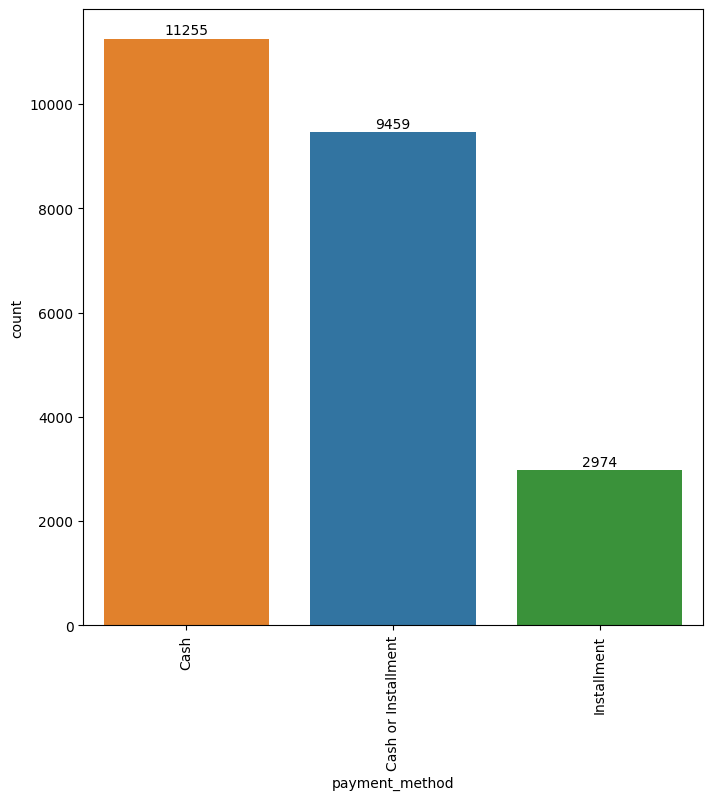

In [92]:
bar_func('payment_method')

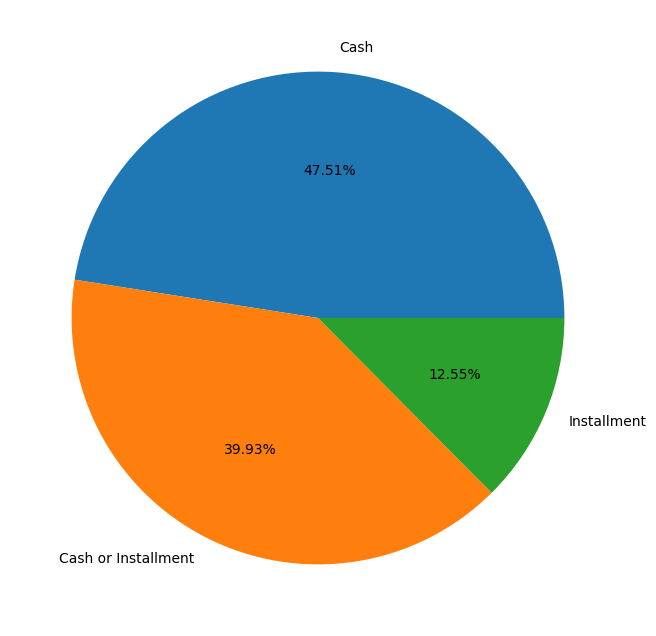

In [93]:
pie_func('payment_method')

#           ['total_reviews', 'region_rating',
#           'schools_rating', 'services', 'quietness', 'location_rating',
#           'transportation_rating', 'markets_rating']
<span style="color:turquoise; font-size:60px; font-weight:bold;"> 13:20-  total_reviews</span>

In [94]:
df.total_reviews.unique()

array(['5.8', '6.7', '8.7', '8.3', nan, '3.3', '7.1', '9.5', '8.5', '9.3',
       '7.3', '5.7', '8.0', '7.4', '5.6', '7', '6.6', '7.0', '9.6', '8.9',
       '4.5', '[]', '6.9', '6.2', '8.1', '8', '5.4', '8.8', '7.8', '5.0',
       '9.0', ' ', '7.6', '7.5', '6.0', '9.1', '9.4', '7.2', '8.6', '6.4',
       '9.7', '5.5', '7.7', '8.4', '8.2', '2.9', '6', '7.9', '5',
       'من المهم دائمًا أن نسعى لإيجاد أماكن تلبي احتياجاتنا ورغباتنا، سواء كنا نبحث عن منزل للعيش مع أسرتنا أو تبحث عن مشروع استثماري واعد. تلك الأماكن التي تجمع بين الراحة والجمال والاستدامة ليست سهلة العثور عليها، ولكن عندما تجتمع كل هذه العوامل في مكان واحد، يصبح لدينا فرصة فريدة لخلق حياة مثالية كما هو الحال في كمبوند البروج طريق الاسماعيلية او كما يعتقد البعض بأن كمبوند البروج بالتجمع الخامس.',
       '9', '9.2', '5.9',
       'مشروع كمبوند بلو تري التجمع الخامس هو كمبوند سكني متكامل في القاهرة الجديدة على مساحة ضخمة تضم الكثير من المساحات الخضراء واللاند سكيب والحدائق من تنفيذ شركة أبو ظبي للتطوير، يضم المشروع شقق عادية 

In [95]:
z=['total_reviews', 'region_rating',
    'schools_rating', 'services', 'quietness', 'location_rating',
    'transportation_rating', 'markets_rating']
for i in z:
    df[i]=df[i].str.extract('(\d\.?\d*)',expand=False)
    print(df[i].unique())
    print('**'*20)

['5.8' '6.7' '8.7' '8.3' nan '3.3' '7.1' '9.5' '8.5' '9.3' '7.3' '5.7'
 '8.0' '7.4' '5.6' '7' '6.6' '7.0' '9.6' '8.9' '4.5' '6.9' '6.2' '8.1' '8'
 '5.4' '8.8' '7.8' '5.0' '9.0' '7.6' '7.5' '6.0' '9.1' '9.4' '7.2' '8.6'
 '6.4' '9.7' '5.5' '7.7' '8.4' '8.2' '2.9' '6' '7.9' '5' '9' '9.2' '5.9'
 '6.3' '2.6' '4' '5.3' '4.0' '6.1' '6.5' '60']
****************************************
['6.0' '10' '9.0' nan '4.0' '7.0' '9' '3.7' '7' '5.0' '8.0' '9.7' '5.7'
 '6.5' '8' '8.3' '9.3' '3.3' '7.7' '6' '9.5' '5.5' '7.5' '4.3' '8.5' '4.7'
 '5.3' '3.0' '4' '6.7' '4.5' '5' '1.0' '60']
****************************************
['6.0' '9.0' '8.0' nan '1.0' '9' '7.0' '7.3' '5.7' '10' '6' '6.7' '9.3'
 '3.7' '2.0' '6.3' '5.5' '7' '7.7' '8.3' '8' '8.7' '4.7' '2.7' '5.0' '3.0'
 '8.5' '5.3' '4' '5' '3' '1']
****************************************
['6.0' '7.0' '9.0' nan '1.0' '8.0' '10' '5.5' '7.7' '4' '6' '8.7' '3.7'
 '1.7' '4.0' '8.3' '5.0' '7' '8' '9.3' '9' '7.3' '9.7' '5.7' '2.0' '4.7'
 '3.0' '3.5' '5' '5.3' '

In [96]:
for i in z:
    df.loc[df[i].astype(float)>10,i]=np.nan


<span style="color:turquoise; font-size:60px; font-weight:bold;"> 21-  price_per_meter</span>

In [97]:
df.price_per_meter.unique()

array(['20,000 جنيه/متر²', '22,174 جنيه/متر²', '29,250 جنيه/متر²', ...,
       '23,430 جنيه/متر²', '25,352 جنيه/متر²', '25,712 جنيه/متر²'],
      shape=(8524,), dtype=object)

In [98]:
df.price_per_meter=df.price_per_meter.str.replace(',','')
df.price_per_meter=df.price_per_meter.str.extract('(\d+)',expand=False)

In [99]:
df.price_per_meter=df.price_per_meter.astype(int)
df.price_per_meter.unique()

array([20000, 22174, 29250, ..., 23430, 25352, 25712], shape=(8136,))


<span style="color:turquoise; font-size:60px; font-weight:bold;"> 22-  price</span>

In [100]:
df.price=df.price.str.replace('\n    جنيه','')
df.price=df.price.str.replace(',','').astype(int)
df.price.unique()

array([1920000, 5100000, 4680000, ..., 5442000, 4943568, 3754000],
      shape=(5259,))

In [101]:
# How many rows not mach with price_per_meter
df[(round(df.price/df.area) != df.price_per_meter)].shape

(143, 28)

In [102]:
# upgrade price_per_meter
df.price_per_meter = round(df.price/df.area).astype(int)


<span style="color:turquoise; font-size:60px; font-weight:bold;"> 23-  description</span>

In [103]:
df['elevator']=df["description"].str.contains('سانسير')

In [104]:
df.loc[df.floor_number.astype(float)>=8 ,'elevator']=True

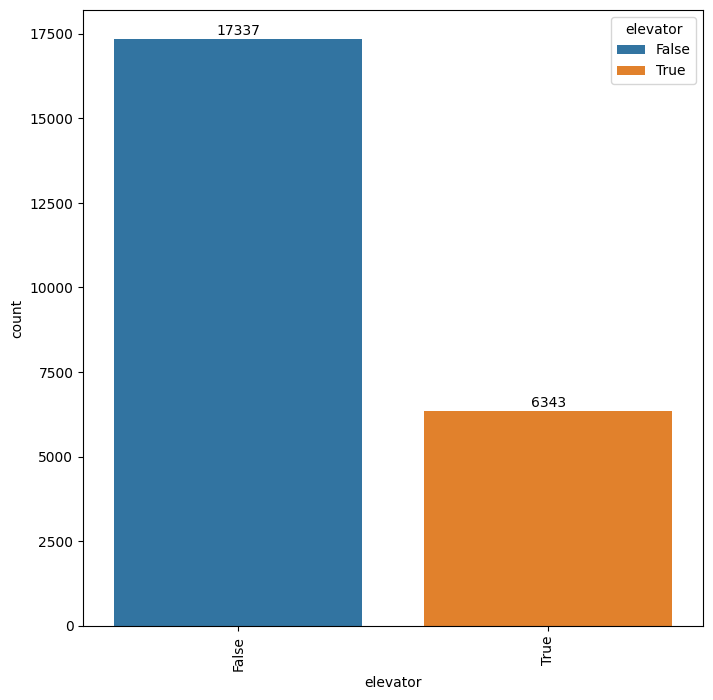

In [105]:
bar_func('elevator')

In [106]:
df[df.elevator.isna()].shape

(8, 29)

In [107]:
df.loc[df.elevator.isna(),'elevator']=False

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23688 entries, 0 to 23691
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ad_id                  23688 non-null  object
 1   owner_type             23688 non-null  object
 2   ad_title               23688 non-null  object
 3   location               23688 non-null  object
 4   area                   23688 non-null  int64 
 5   rooms                  22290 non-null  object
 6   bathrooms              20719 non-null  object
 7   finish_status          23459 non-null  object
 8   floor_number           22456 non-null  object
 9   year_of_building       23454 non-null  object
 10  views                  19798 non-null  object
 11  payment_method         23688 non-null  object
 12  total_reviews          7586 non-null   object
 13  region_rating          7586 non-null   object
 14  schools_rating         7370 non-null   object
 15  services               7

In [109]:
df['has_reviews']= ~df.total_reviews.isna()
df['has_reviews']

0         True
1         True
2         True
3         True
4         True
         ...  
23687    False
23688    False
23689    False
23690    False
23691    False
Name: has_reviews, Length: 23688, dtype: bool

<span style="color:orange; font-size:50px; font-weight:bold;">
💾 Saving the Main Dataset
</span>


In [110]:
# Export the cleaned dataset to a CSV file with UTF-8 encoding and without the index column
df.to_csv('real_estate_cleaned.csv', encoding="utf-8-sig",index=False)

<span style="color:orange; font-size:80px; font-weight:bold;">Preparing the Data for Analysis</span>


<span style="color:orange; font-size:40px; font-weight:bold;">- Missing Values & Unnecessary Columns</span>


In [111]:
data=df.copy()

In [112]:
# Missing Values
round(data.isna().mean()*100 ,2)

ad_id                     0.00
owner_type                0.00
ad_title                  0.00
location                  0.00
area                      0.00
rooms                     5.90
bathrooms                12.53
finish_status             0.97
floor_number              5.20
year_of_building          0.99
views                    16.42
payment_method            0.00
total_reviews            67.98
region_rating            67.98
schools_rating           68.89
services                 67.98
quietness                68.44
location_rating          67.98
transportation_rating    67.97
markets_rating           67.97
description               0.04
link                      0.00
price_per_meter           0.00
price                     0.00
type_of_unite             0.00
in_compound               0.00
city                      0.00
region                    0.00
elevator                  0.00
has_reviews               0.00
dtype: float64

In [113]:
data.drop(columns=['ad_id' , 'ad_title','location','total_reviews', 'region_rating',
       'schools_rating', 'services', 'quietness', 'location_rating',
       'transportation_rating', 'markets_rating', 'description', 'link',],inplace=True)
data.head()

owner_type  area rooms bathrooms       finish_status  \
0             Developer    96     2         2       Semi-Finished   
1        Property Owner   230     4         2        Super Luxury   
2  Real Estate Marketer   160     3         2       Semi-Finished   
3  Real Estate Marketer   300     3         3  Extra Super Luxury   
4  Real Estate Marketer   110     2         2       Semi-Finished   

  floor_number year_of_building        views       payment_method  \
0            2             2028  Main Street  Cash or Installment   
1            2             2025       Corner                 Cash   
2            2             2027       Garden                 Cash   
3           11             2020  Side Street                 Cash   
4            0             2025       Garden                 Cash   

   price_per_meter    price type_of_unite  in_compound           city  \
0            20000  1920000     Apartment            0  Greater Cairo   
1            22174  5100000     Apartment            0  Greater Cairo   
2            29250  4680000     Apartment            1  Greater Cairo   
3            30000  9000000        Duplex            0  Greater Cairo   
4            53636  5900000     Apartment            1  Greater Cairo   

                               region elevator  has_reviews  
0              Vida Residence - Kayan    False         True  
1                  شارع كورنيش المقطم    False         True  
2  كمبوند ذا ايكون جاردنز - ستايل هوم    False         True  
3            شارع جامعة الدول العربية     True         True  
4         تاج سلطان - كمبوند تاج سيتي    False         True

In [114]:
# re_arangement the columns for DataFrame
col=['city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area', 'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
        'year_of_building', 'views', 'has_reviews', 'payment_method', 'price_per_meter', 'price']
data=data[col]
data.head()

city                              region type_of_unite  \
0  Greater Cairo              Vida Residence - Kayan     Apartment   
1  Greater Cairo                  شارع كورنيش المقطم     Apartment   
2  Greater Cairo  كمبوند ذا ايكون جاردنز - ستايل هوم     Apartment   
3  Greater Cairo            شارع جامعة الدول العربية        Duplex   
4  Greater Cairo         تاج سلطان - كمبوند تاج سيتي     Apartment   

   in_compound            owner_type  area rooms bathrooms floor_number  \
0            0             Developer    96     2         2            2   
1            0        Property Owner   230     4         2            2   
2            1  Real Estate Marketer   160     3         2            2   
3            0  Real Estate Marketer   300     3         3           11   
4            1  Real Estate Marketer   110     2         2            0   

  elevator       finish_status year_of_building        views  has_reviews  \
0    False       Semi-Finished             2028  Main Street         True   
1    False        Super Luxury             2025       Corner         True   
2    False       Semi-Finished             2027       Garden         True   
3     True  Extra Super Luxury             2020  Side Street         True   
4    False       Semi-Finished             2025       Garden         True   

        payment_method  price_per_meter    price  
0  Cash or Installment            20000  1920000  
1                 Cash            22174  5100000  
2                 Cash            29250  4680000  
3                 Cash            30000  9000000  
4                 Cash            53636  5900000

In [115]:
data.duplicated().sum()

np.int64(2206)

In [116]:
data.drop_duplicates(inplace=True,ignore_index=True)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21482 entries, 0 to 21481
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              21482 non-null  object
 1   region            21482 non-null  object
 2   type_of_unite     21482 non-null  object
 3   in_compound       21482 non-null  int64 
 4   owner_type        21482 non-null  object
 5   area              21482 non-null  int64 
 6   rooms             20098 non-null  object
 7   bathrooms         18532 non-null  object
 8   floor_number      20259 non-null  object
 9   elevator          21482 non-null  object
 10  finish_status     21262 non-null  object
 11  year_of_building  21257 non-null  object
 12  views             17829 non-null  object
 13  has_reviews       21482 non-null  bool  
 14  payment_method    21482 non-null  object
 15  price_per_meter   21482 non-null  int64 
 16  price             21482 non-null  int64 
dtypes: bool(1), 

In [118]:
data.isna().mean()*100

city                 0.000000
region               0.000000
type_of_unite        0.000000
in_compound          0.000000
owner_type           0.000000
area                 0.000000
rooms                6.442603
bathrooms           13.732427
floor_number         5.693138
elevator             0.000000
finish_status        1.024113
year_of_building     1.047389
views               17.004934
has_reviews          0.000000
payment_method       0.000000
price_per_meter      0.000000
price                0.000000
dtype: float64

In [119]:
bins = [0, 80, 120, 160, 300, 10000]
labels = ['Small', 'Medium', 'Large', 'X-Large', 'Huge']

data['area_category'] = pd.cut(data['area'], bins=bins, labels=labels)

In [120]:
rooms_dict=data.groupby('area_category')['rooms'].agg(lambda x: x.mode().iloc[0] ).to_dict()
data.rooms=data.rooms.fillna(data['area_category'].map(rooms_dict))

In [121]:
bathrooms_dict=data.groupby('area_category')['bathrooms'].agg(lambda x: x.mode().iloc[0] ).to_dict()
data.bathrooms=data.bathrooms.fillna(data['area_category'].map(bathrooms_dict))

In [122]:
views_dict=data.groupby('region')['views'].agg(lambda x: x.mode().iloc[0] if len(x.mode())>0 else np.nan ).to_dict()
data.views=data.views.fillna(data['region'].map(views_dict))

In [123]:
data.isna().mean()*100

city                0.000000
region              0.000000
type_of_unite       0.000000
in_compound         0.000000
owner_type          0.000000
area                0.000000
rooms               0.000000
bathrooms           0.000000
floor_number        5.693138
elevator            0.000000
finish_status       1.024113
year_of_building    1.047389
views               1.559445
has_reviews         0.000000
payment_method      0.000000
price_per_meter     0.000000
price               0.000000
area_category       0.000000
dtype: float64

In [124]:
data.dropna(subset=['floor_number','finish_status','year_of_building','views'],inplace=True)

In [125]:
data.isna().sum()

city                0
region              0
type_of_unite       0
in_compound         0
owner_type          0
area                0
rooms               0
bathrooms           0
floor_number        0
elevator            0
finish_status       0
year_of_building    0
views               0
has_reviews         0
payment_method      0
price_per_meter     0
price               0
area_category       0
dtype: int64

In [126]:
def floor_category(x):
    if x == 0:
        return 'ground'
    elif x <= 3:
        return 'low'
    elif x <= 7:
        return 'mid'
    elif x < 15:
        return 'high'
    elif x >=15:
        return 'top_floor'
    else:
        return  x

data['floor_category'] = data['floor_number'].astype(float).apply(floor_category)

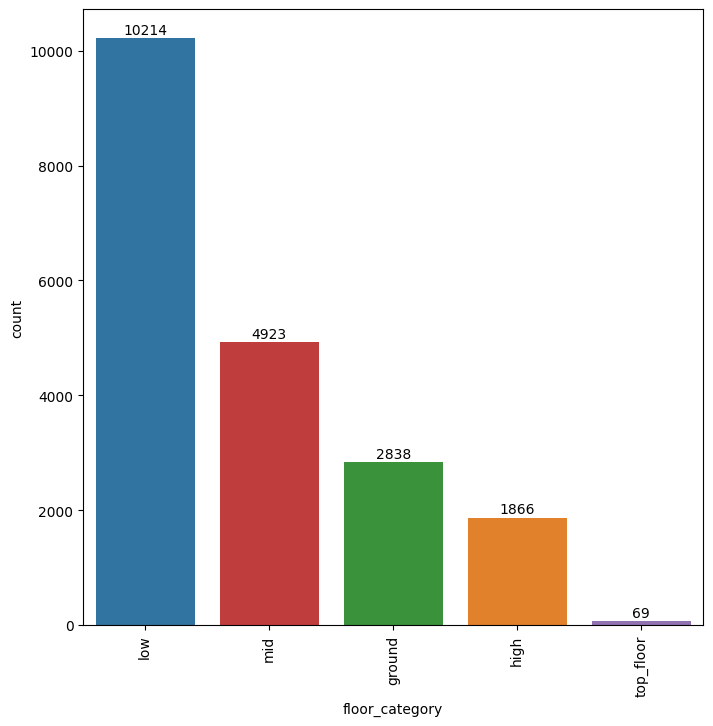

In [127]:
bar_func('floor_category',dataframe=data)

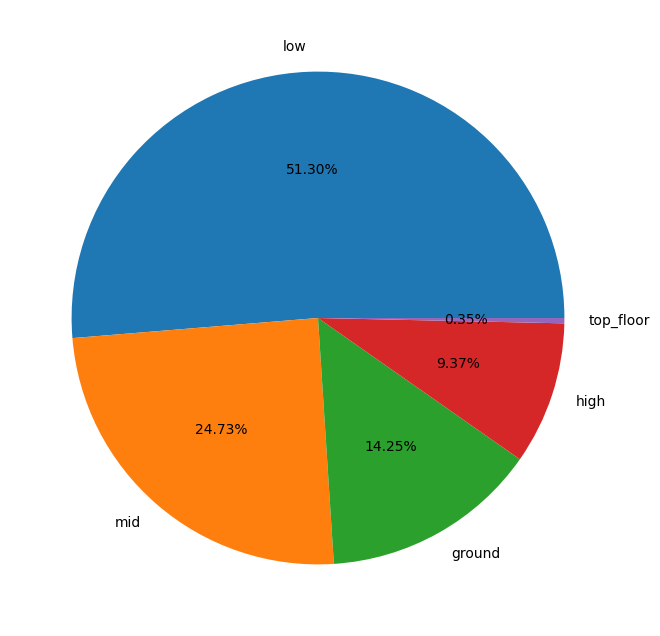

In [128]:
pie_func('floor_category',dataframe=data)

In [129]:
def categorize_year(y):
    if pd.isna(y):
        return np.nan
    elif y < 2000:
        return 'old'
    elif y <= 2015:
        return 'medium'
    else:
        return 'new'

data['building_category'] = data['year_of_building'].astype('float').apply(categorize_year)

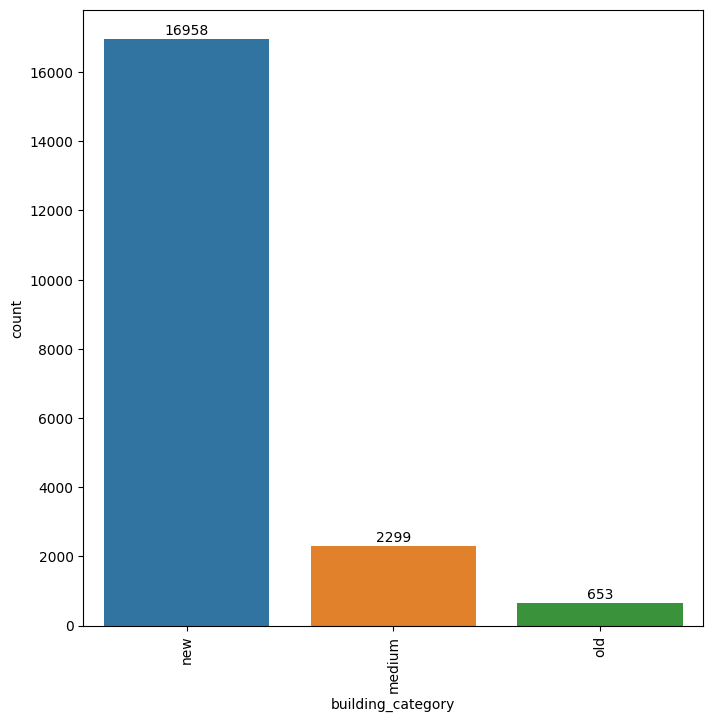

In [130]:
bar_func('building_category',dataframe=data)

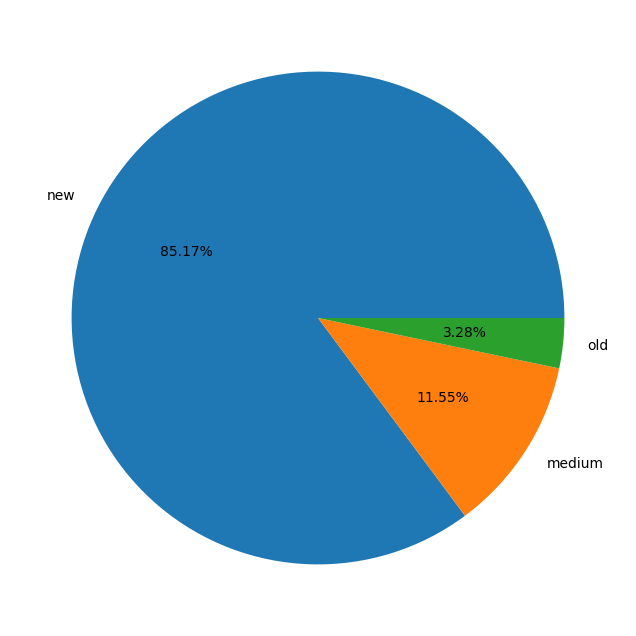

In [131]:
pie_func('building_category',dataframe=data)


<span style="color:orange; font-size:70px; font-weight:bold;"> EDA</span>

In [132]:
data.head(5)

city                              region type_of_unite  \
0  Greater Cairo              Vida Residence - Kayan     Apartment   
1  Greater Cairo                  شارع كورنيش المقطم     Apartment   
2  Greater Cairo  كمبوند ذا ايكون جاردنز - ستايل هوم     Apartment   
3  Greater Cairo            شارع جامعة الدول العربية        Duplex   
4  Greater Cairo         تاج سلطان - كمبوند تاج سيتي     Apartment   

   in_compound            owner_type  area rooms bathrooms floor_number  \
0            0             Developer    96     2         2            2   
1            0        Property Owner   230     4         2            2   
2            1  Real Estate Marketer   160     3         2            2   
3            0  Real Estate Marketer   300     3         3           11   
4            1  Real Estate Marketer   110     2         2            0   

  elevator       finish_status year_of_building        views  has_reviews  \
0    False       Semi-Finished             2028  Main Street         True   
1    False        Super Luxury             2025       Corner         True   
2    False       Semi-Finished             2027       Garden         True   
3     True  Extra Super Luxury             2020  Side Street         True   
4    False       Semi-Finished             2025       Garden         True   

        payment_method  price_per_meter    price area_category floor_category  \
0  Cash or Installment            20000  1920000        Medium            low   
1                 Cash            22174  5100000       X-Large            low   
2                 Cash            29250  4680000         Large            low   
3                 Cash            30000  9000000       X-Large           high   
4                 Cash            53636  5900000        Medium         ground   

  building_category  
0               new  
1               new  
2               new  
3               new  
4               new

In [133]:
data.dtypes

city                   object
region                 object
type_of_unite          object
in_compound             int64
owner_type             object
area                    int64
rooms                  object
bathrooms              object
floor_number           object
elevator               object
finish_status          object
year_of_building       object
views                  object
has_reviews              bool
payment_method         object
price_per_meter         int64
price                   int64
area_category        category
floor_category         object
building_category      object
dtype: object

In [134]:
data.in_compound=data.in_compound.astype(bool)

In [135]:
round(data.describe(),1)

area  price_per_meter        price
count  19910.0          19910.0      19910.0
mean     143.2          33947.3    4728084.1
std       57.0          29512.5    4823157.1
min       20.0            833.0     107000.0
25%      105.0          14500.0    2000000.0
50%      135.0          26959.0    3690000.0
75%      169.0          45000.0    5600000.0
max      740.0         750000.0  150000000.0

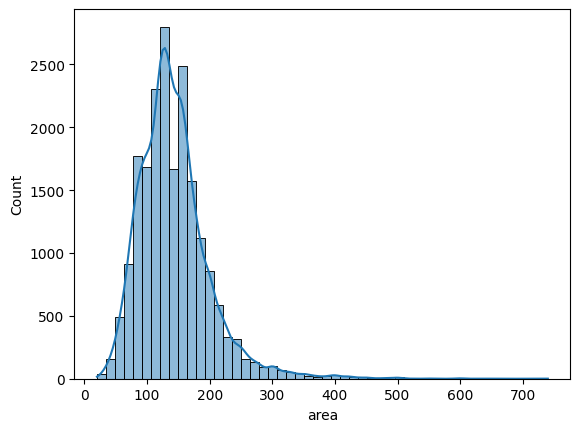

In [136]:
sns.histplot(data=data, x='area',bins=50,kde=True)
plt.show()

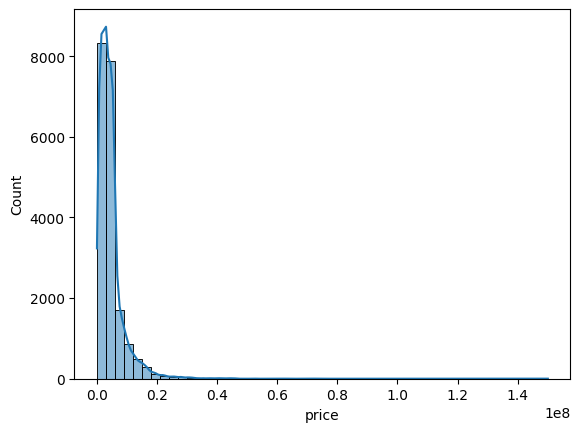

In [137]:
sns.histplot(data=data, x='price',bins=50,kde=True)
plt.show()


<span style="color:orange; font-size:70px; font-weight:bold;"> outliers</span>

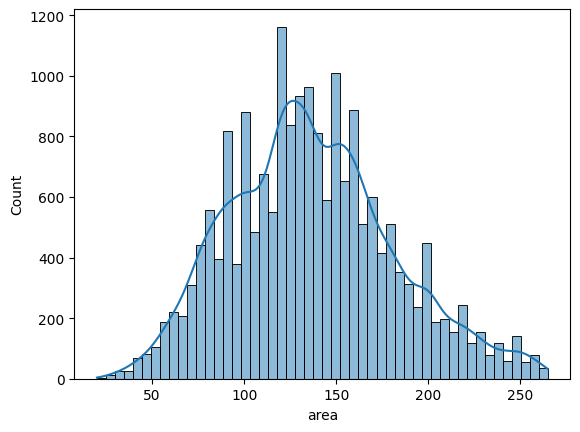

In [138]:
outlier_area_index = detect_outliers(data, 0, ['area'])
# the area distrbution aftar we dropd outliers
sns.histplot(data=data.drop(index=outlier_area_index) , x='area',bins=50,kde=True)
plt.show()

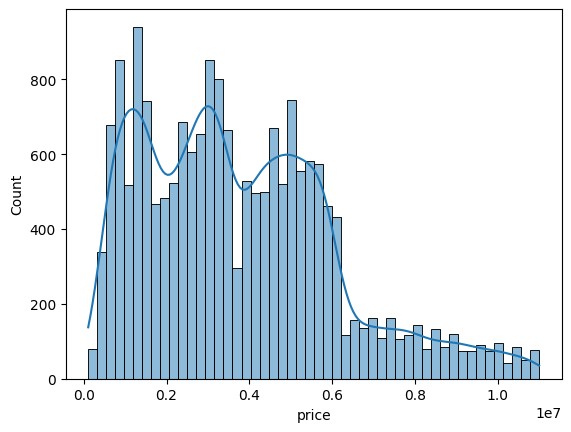

In [139]:
outlier_price_index = detect_outliers(data, 0, ['price'])
# the price distrbution aftar we dropd outliers
sns.histplot(data=data.drop(index=outlier_price_index) , x='price',bins=50,kde=True)
plt.show()

In [140]:

indexs=[]
indexs.extend(outlier_area_index)
indexs.extend(outlier_price_index)

In [141]:
len(indexs)

2022

In [142]:
outliers_data=data.loc[indexs , :]

In [143]:
data.drop(index=indexs  , inplace=True )

In [144]:
data=data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18060 entries, 0 to 18059
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   city               18060 non-null  object  
 1   region             18060 non-null  object  
 2   type_of_unite      18060 non-null  object  
 3   in_compound        18060 non-null  bool    
 4   owner_type         18060 non-null  object  
 5   area               18060 non-null  int64   
 6   rooms              18060 non-null  object  
 7   bathrooms          18060 non-null  object  
 8   floor_number       18060 non-null  object  
 9   elevator           18060 non-null  object  
 10  finish_status      18060 non-null  object  
 11  year_of_building   18060 non-null  object  
 12  views              18060 non-null  object  
 13  has_reviews        18060 non-null  bool    
 14  payment_method     18060 non-null  object  
 15  price_per_meter    18060 non-null  int64   
 16  pric

In [145]:
data.describe()

area  price_per_meter         price
count  18060.000000     18060.000000  1.806000e+04
mean     134.315227     29516.385382  3.739281e+06
std       43.521277     19702.674088  2.319475e+06
min       20.000000       833.000000  1.070000e+05
25%      100.000000     14000.000000  1.800000e+06
50%      131.000000     25581.000000  3.360000e+06
75%      160.000000     40502.750000  5.197500e+06
max      265.000000    180000.000000  1.100000e+07

In [146]:
data.select_dtypes(exclude=['number']).describe()

city             region type_of_unite in_compound  \
count           18060              18060         18060       18060   
unique             28               2212             4           2   
top     Greater Cairo  El Khamsin Street     Apartment       False   
freq            13336                382         16874       11609   

                  owner_type  rooms bathrooms floor_number elevator  \
count                  18060  18060     18060        18060    18060   
unique                     4      7         5           21        2   
top     Real Estate Marketer      3         2            2    False   
freq                   13786  10020      7901         3652    12790   

        finish_status year_of_building        views has_reviews  \
count           18060            18060        18060       18060   
unique              5               71           13           2   
top     Semi-Finished             2025  Main Street       False   
freq             6063             4500         8458       12041   

       payment_method area_category floor_category building_category  
count           18060         18060          18060             18060  
unique              3             4              5                 3  
top              Cash         Large            low               new  
freq             9684          6421           9474             15194


<span style="color:orange; font-size:70px; font-weight:bold;"> Bivariat</span>

In [147]:
data.groupby('city')['views'].agg(lambda x : x.mode()[0])

city
Ain Sokhna                   Sea
Alexandria           Main Street
Assiut               Main Street
Aswan                Side Street
Beheira              Side Street
Beni Suef            Main Street
Dakahlia             Side Street
Damietta                  Garden
Fayoum               Main Street
Gharbia              Main Street
Greater Cairo        Main Street
Hurghada           Swimming Pool
Ismailia             Main Street
Kafr El-Sheikh       Main Street
Luxor                Main Street
Marsa Matrouh                Sea
Minya                Side Street
Monufia              Main Street
North Coast                  Sea
North Sinai                 Lake
Port Said            Main Street
Qalyubia             Main Street
Qena                 Main Street
Ras Sudr             Main Street
Sharm El-Sheikh    Swimming Pool
Sharqia              Main Street
Sohag                Main Street
Suez                 Main Street
Name: views, dtype: object

In [148]:
data.select_dtypes('number').corr()

area  price_per_meter     price
area             1.000000        -0.262665  0.322387
price_per_meter -0.262665         1.000000  0.766252
price            0.322387         0.766252  1.000000

<Axes: >

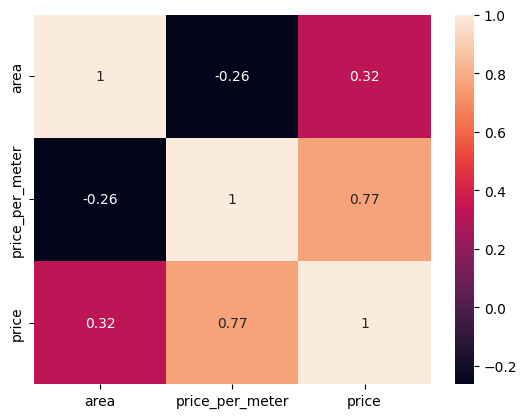

In [149]:
sns.heatmap(data.select_dtypes('number').corr() ,annot=True)

<Figure size 800x800 with 0 Axes>

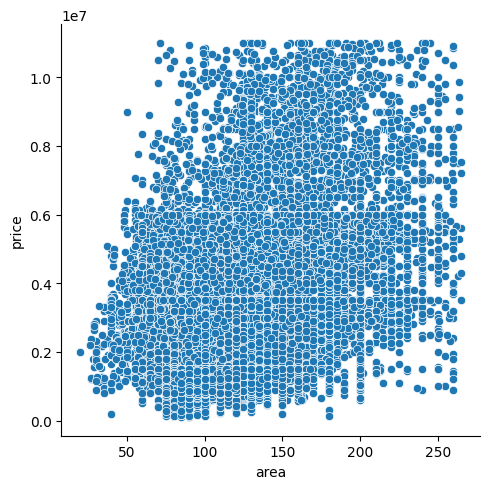

In [150]:
plt.figure(figsize=(8,8))
sns.relplot(data=data,x='area',y='price', kind='scatter')
plt.show()

<Figure size 800x800 with 0 Axes>

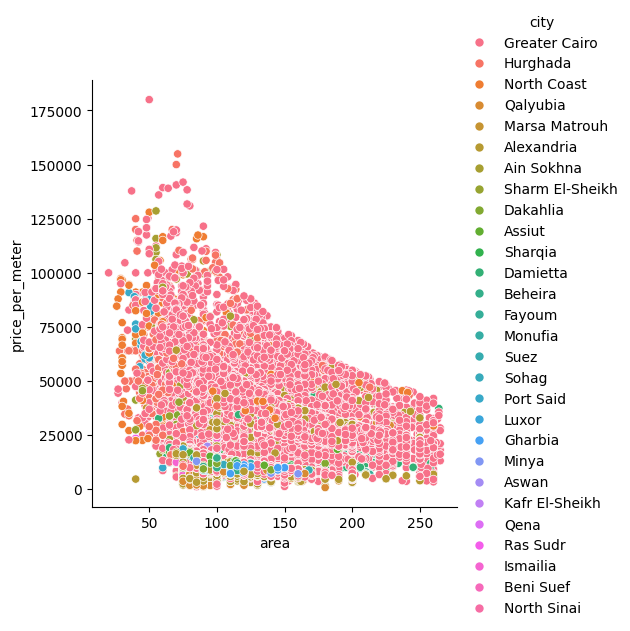

In [151]:
plt.figure(figsize=(8,8))
sns.relplot(data=data,x='area',y='price_per_meter', kind='scatter',hue='city')
plt.show()

<Figure size 800x800 with 0 Axes>

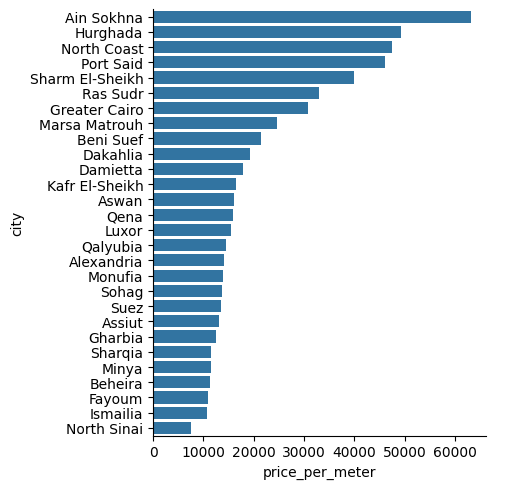

In [152]:
plt.figure(figsize=(8,8))
order = data.groupby('city')['price_per_meter'].mean().sort_values(ascending=False).index
sns.catplot(data=data , x='price_per_meter',y='city',kind='bar' , ci=None ,order=order)
plt.show()

<Figure size 800x800 with 0 Axes>

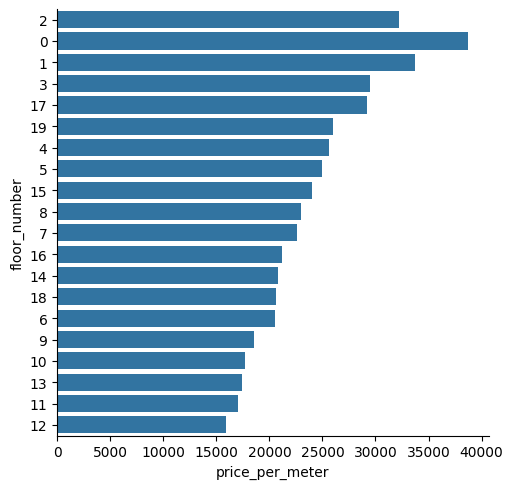

In [153]:
plt.figure(figsize=(8,8))
order = data.groupby('floor_number')['price_per_meter'].mean().sort_values(ascending=False).index
sns.catplot(data=data , x='price_per_meter',y='floor_number',kind='bar' , ci=None ,order=order)
plt.show()

In [154]:
data.columns

Index(['city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area',
       'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
       'year_of_building', 'views', 'has_reviews', 'payment_method',
       'price_per_meter', 'price', 'area_category', 'floor_category',
       'building_category'],
      dtype='object')

<Figure size 800x800 with 0 Axes>

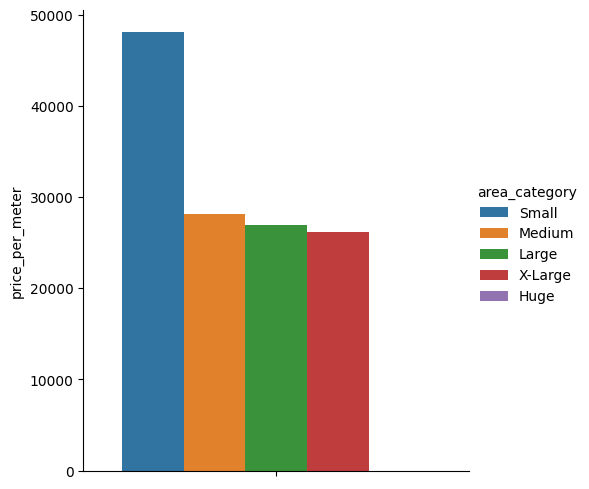

In [155]:
plt.figure(figsize=(8,8))
sns.catplot(data=data , y='price_per_meter',hue='area_category',kind='bar',ci=None)
plt.show()

<Figure size 800x800 with 0 Axes>

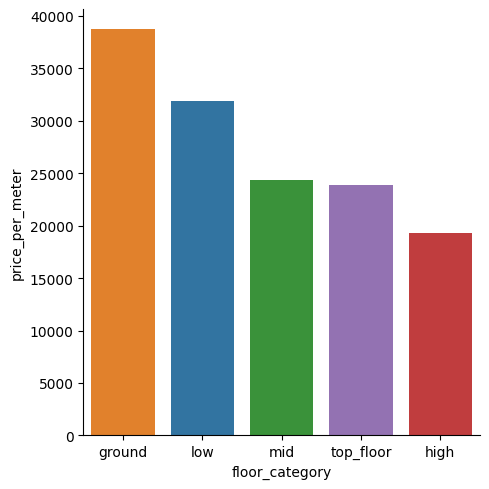

In [156]:
plt.figure(figsize=(8,8))
order = data.groupby('floor_category')['price_per_meter'].mean().sort_values(ascending=False).index
sns.catplot(data=data ,x='floor_category', y='price_per_meter',kind='bar' ,hue='floor_category', ci=None ,order=order)

<Figure size 800x800 with 0 Axes>

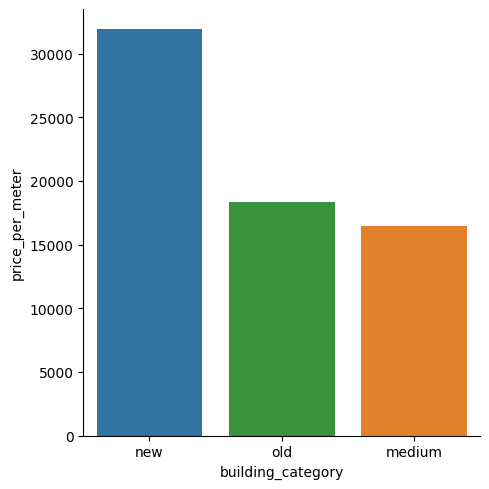

In [157]:
plt.figure(figsize=(8,8))
order = data.groupby('building_category')['price_per_meter'].mean().sort_values(ascending=False).index
sns.catplot(data=data ,x='building_category', y='price_per_meter',kind='bar' ,hue='building_category', ci=None ,order=order)
plt.show()

<Figure size 800x800 with 0 Axes>

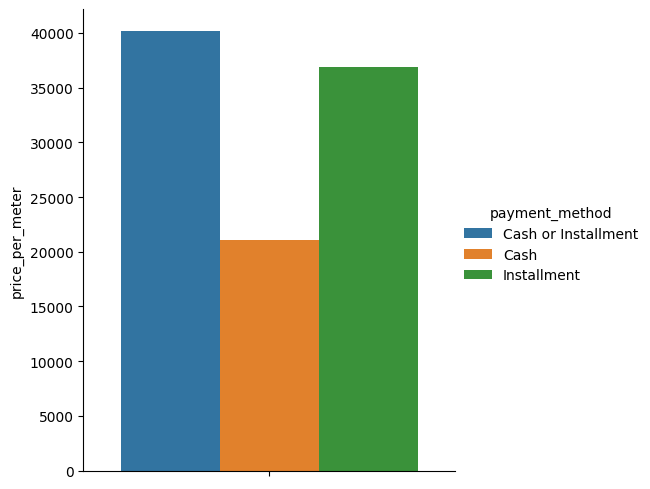

In [158]:
plt.figure(figsize=(8,8))
sns.catplot(data=data , y='price_per_meter',hue='payment_method',kind='bar',ci=None)
plt.show()

<Figure size 800x800 with 0 Axes>

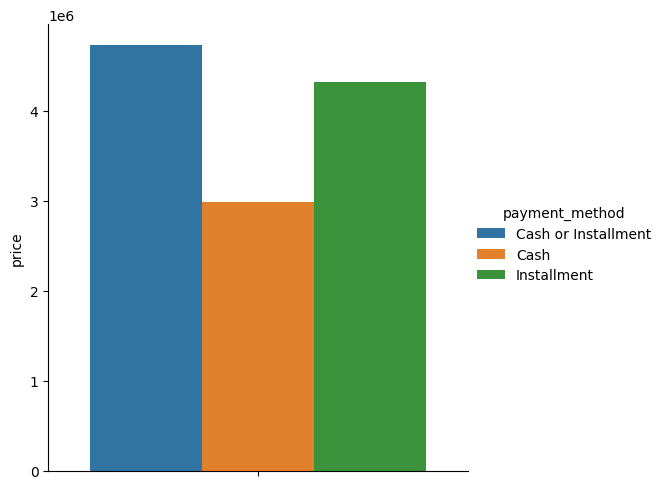

In [159]:
plt.figure(figsize=(8,8))
sns.catplot(data=data , y='price',hue='payment_method',kind='bar',ci=None)
plt.show()

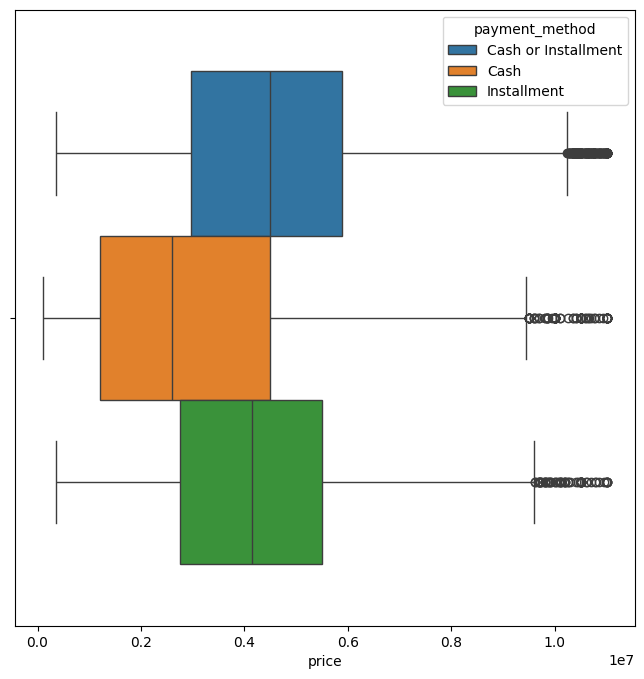

In [160]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data , x='price',hue='payment_method')
plt.show()

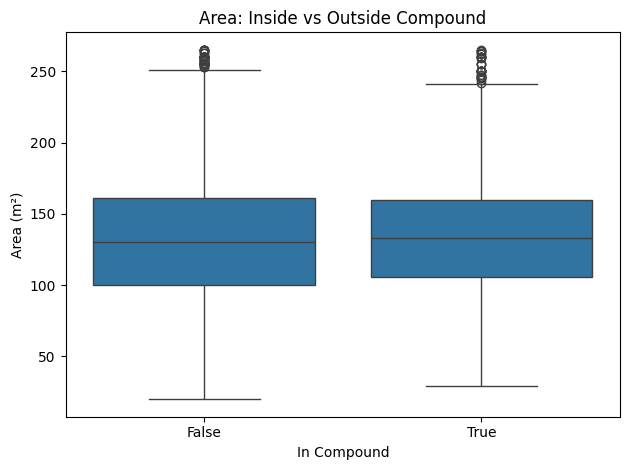

In [161]:
sns.boxplot(data=data, x='in_compound', y='area')
plt.title("Area: Inside vs Outside Compound")
plt.xlabel("In Compound")
plt.ylabel("Area (m²)")
plt.tight_layout()
plt.show()

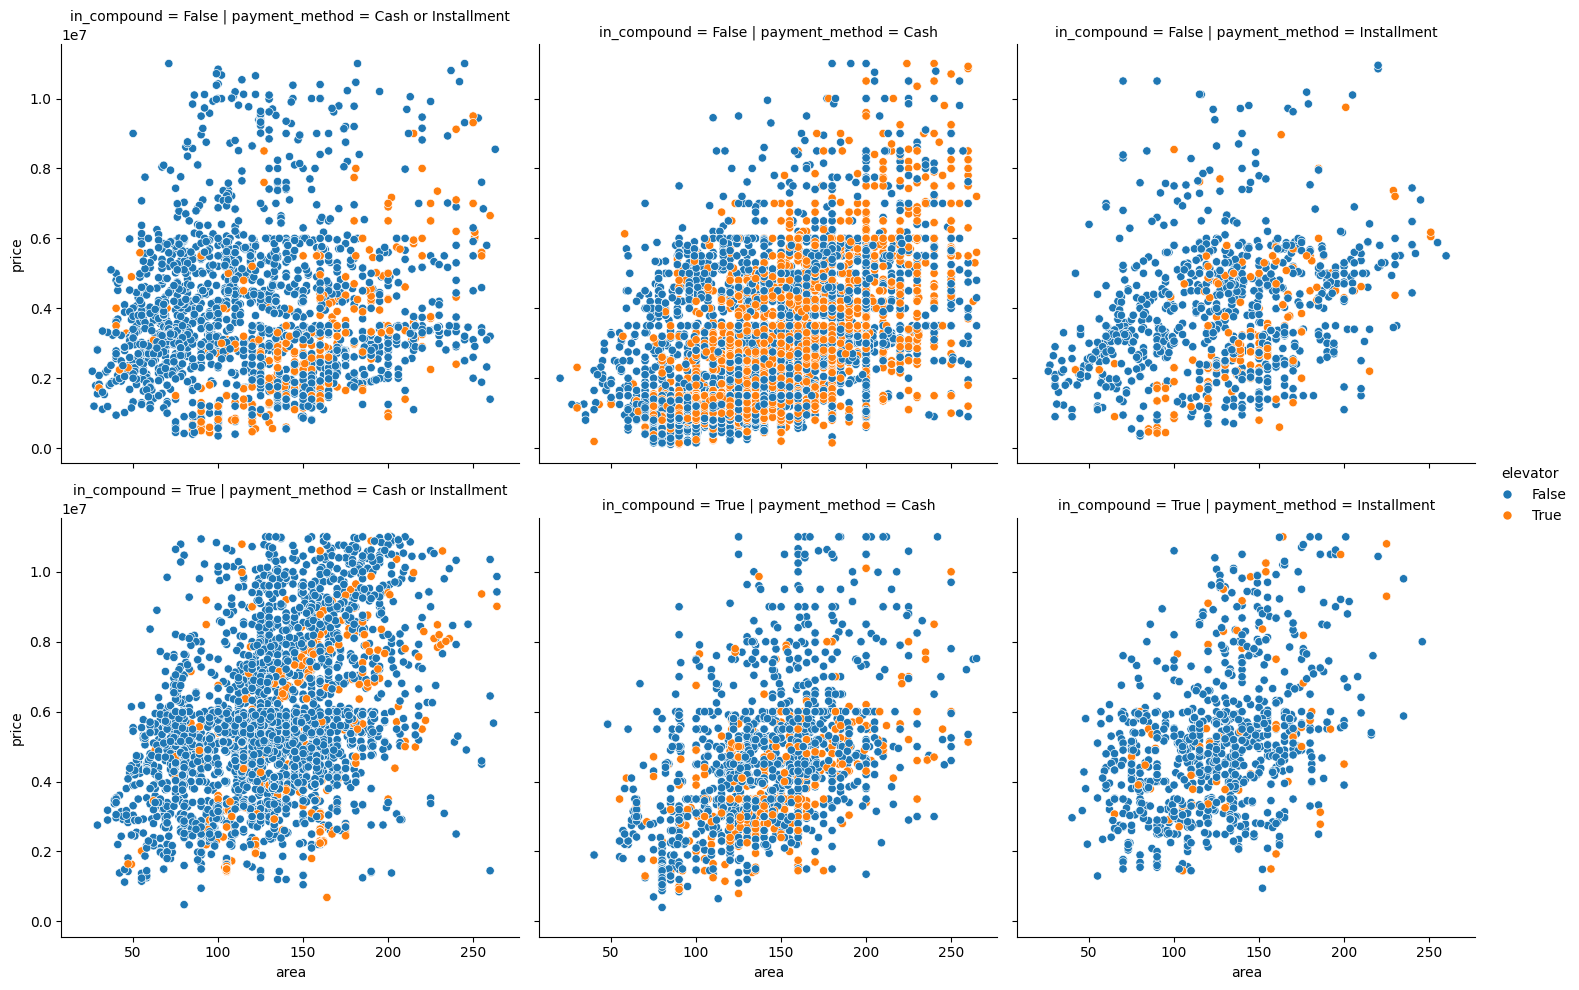

In [162]:
sns.relplot(data=data,x='area',y='price', kind='scatter',row='in_compound',col='payment_method',hue='elevator')
plt.show()

# saving the data to analysis

In [163]:
# Export the cleaned dataset to a CSV file with UTF-8 encoding and without the index column
data.to_csv('real_estate_cleaned for analysis.csv', encoding="utf-8-sig",index=False)

<span style="color:orange; font-size:70px; font-weight:bold;">Some Analytical Questions</span>


<span style="color:white; font-size:50px; font-weight:bold;"> 1- What is the average price per meter in each city?</span>


In [164]:
data.columns

Index(['city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area',
       'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
       'year_of_building', 'views', 'has_reviews', 'payment_method',
       'price_per_meter', 'price', 'area_category', 'floor_category',
       'building_category'],
      dtype='object')

In [165]:
x=data.groupby('city')['price_per_meter'].mean().sort_values(ascending=False)
round(x)

city
Ain Sokhna         63076.0
Hurghada           49254.0
North Coast        47438.0
Port Said          46108.0
Sharm El-Sheikh    39859.0
Ras Sudr           33003.0
Greater Cairo      30876.0
Marsa Matrouh      24677.0
Beni Suef          21429.0
Dakahlia           19352.0
Damietta           17900.0
Kafr El-Sheikh     16572.0
Aswan              16038.0
Qena               15800.0
Luxor              15480.0
Qalyubia           14559.0
Alexandria         14136.0
Monufia            13982.0
Sohag              13690.0
Suez               13407.0
Assiut             13070.0
Gharbia            12520.0
Sharqia            11512.0
Minya              11483.0
Beheira            11360.0
Fayoum             10919.0
Ismailia           10792.0
North Sinai         7500.0
Name: price_per_meter, dtype: float64

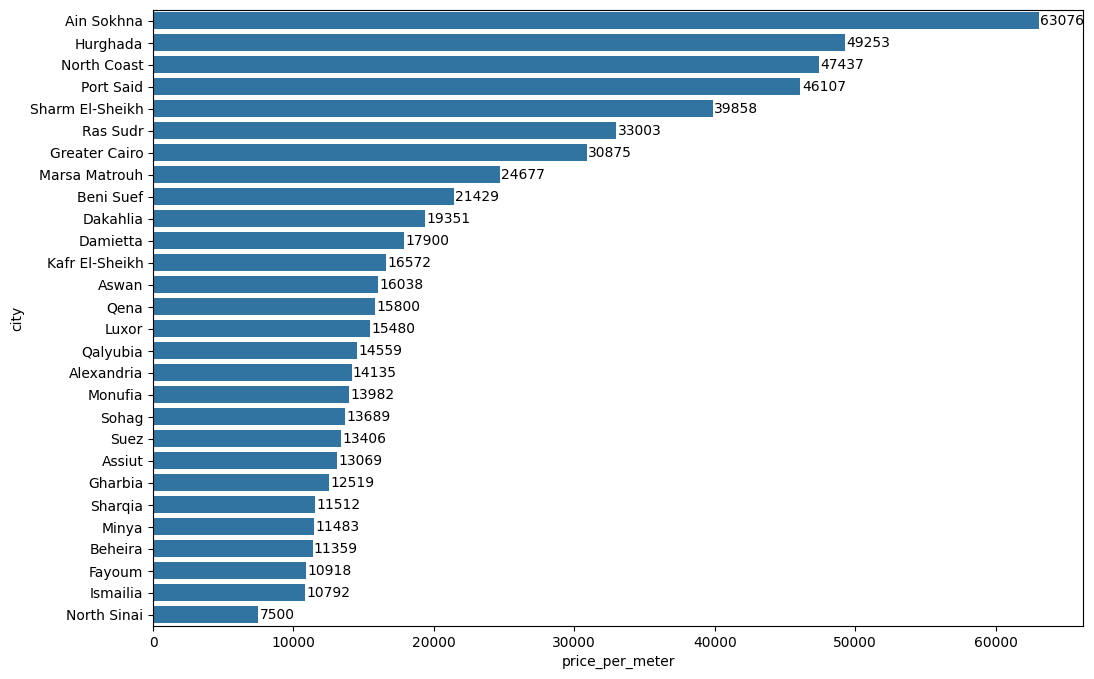

In [166]:
plt.figure(figsize=(12, 8))
ax=sns.barplot(data=data ,x='price_per_meter' , y='city' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=0)
plt.show()

<span style="color:white; font-size:40px; font-weight:bold;"> 2- What is the price per meter difference between different cities and regions?</span>


region

In [167]:
region_avg_price = data.groupby('region')['price_per_meter'].mean().sort_values(ascending=False).head(8)
print(region_avg_price.reset_index())

                              region  price_per_meter
0                          Ghaz Mall    180000.000000
1             Soma Breeze – Soma Bay    154930.000000
2                           Soma Bay    150000.000000
3       Gryian Compound – Palm Hills    139062.000000
4  Central Capital Mall – Amer Group    126537.666667
5       31 West Compound – M Squared    125457.333333
6           Blancs Compound – Menagy    118835.000000
7          Cali Coast Resort – Maven    117442.000000


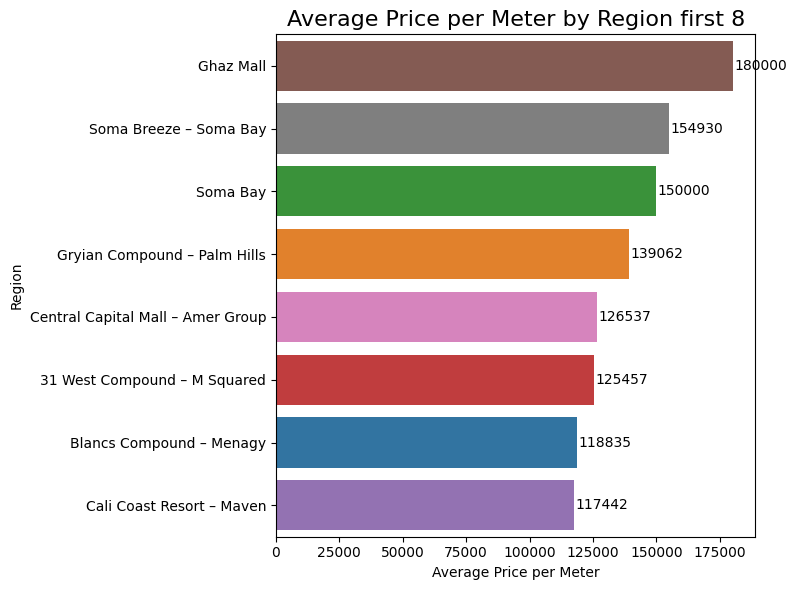

In [168]:
data2=data[data['region'].isin(region_avg_price.index)]
plt.figure(figsize=(8, 6))
ax=sns.barplot(data=data2, y='region', x='price_per_meter', estimator='mean',hue='region', ci=None, order=region_avg_price.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.title("Average Price per Meter by Region first 8", fontsize=16)
plt.xlabel("Average Price per Meter")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# city

In [169]:
city_avg_price = data.groupby('city')['price_per_meter'].mean().sort_values(ascending=False).head(8)
print(round(region_avg_price))

region
Ghaz Mall                            180000.0
Soma Breeze – Soma Bay               154930.0
Soma Bay                             150000.0
Gryian Compound – Palm Hills         139062.0
Central Capital Mall – Amer Group    126538.0
31 West Compound – M Squared         125457.0
Blancs Compound – Menagy             118835.0
Cali Coast Resort – Maven            117442.0
Name: price_per_meter, dtype: float64


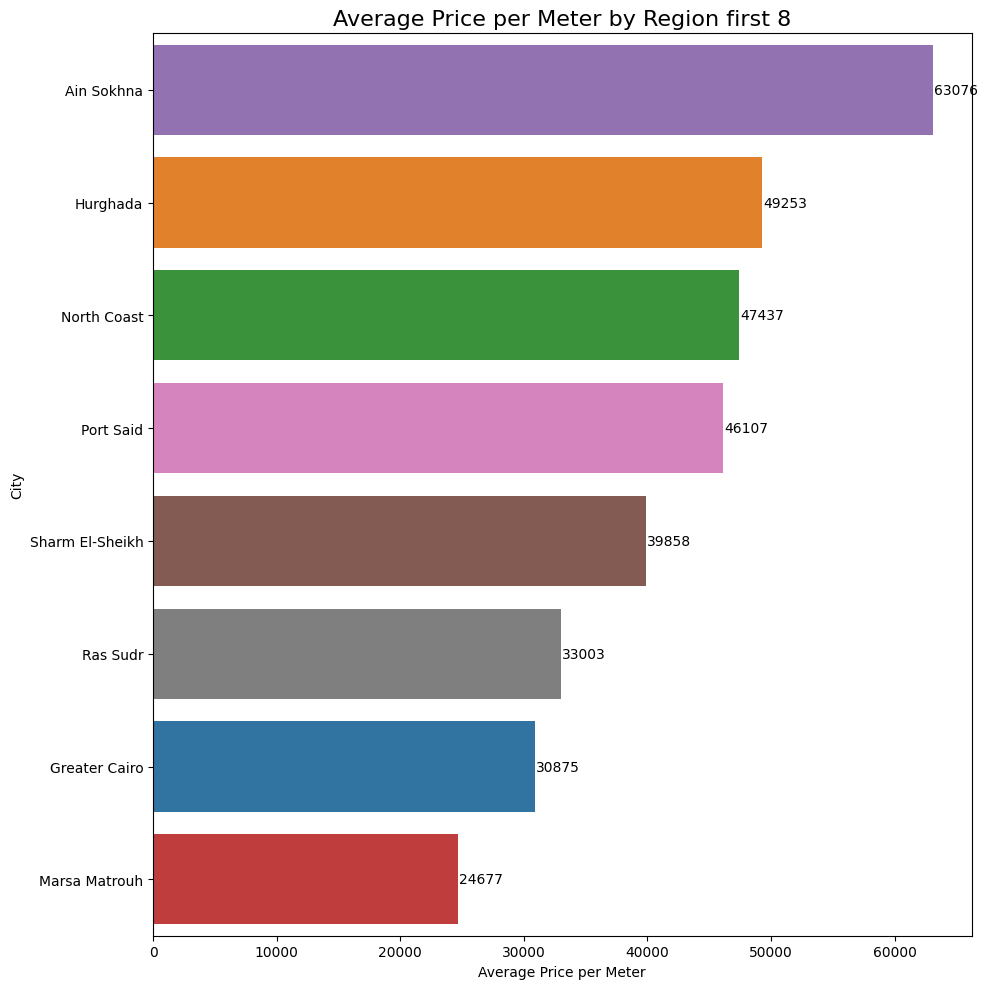

In [170]:
data2=data[data['city'].isin(city_avg_price.index)]
plt.figure(figsize=(10, 10))
ax=sns.barplot(data=data2, y='city', x='price_per_meter',hue='city', ci=None, order=city_avg_price.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.title("Average Price per Meter by Region first 8", fontsize=16)
plt.xlabel("Average Price per Meter")
plt.ylabel("City")
plt.tight_layout()
plt.show()


<span style="color:white; font-size:40px; font-weight:bold;">3- What is the impact of being in a compound on price and area? </span>


In [171]:
data.groupby('in_compound')['price_per_meter'].mean().sort_values(ascending=False)

in_compound
True     40388.599442
False    23474.809630
Name: price_per_meter, dtype: float64

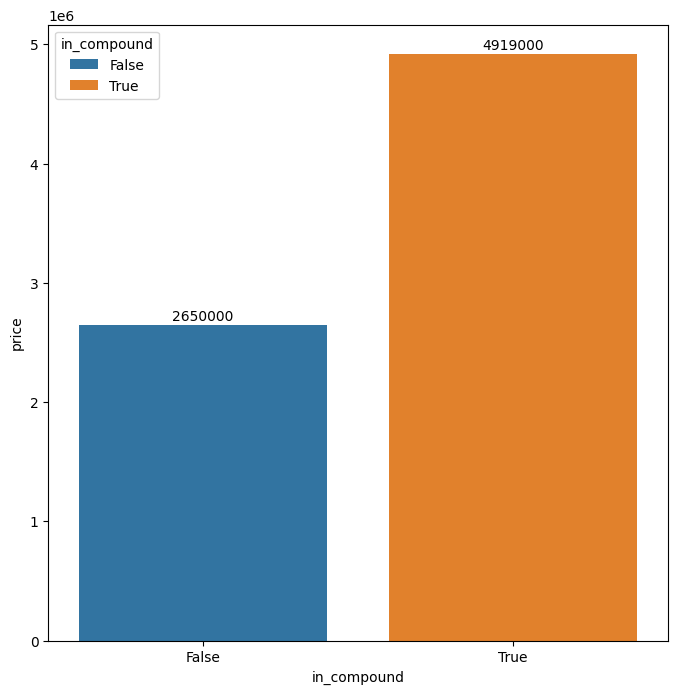

In [172]:
plt.figure(figsize=(8, 8))
ax=sns.barplot(data=data ,x='in_compound' , y='price' ,hue='in_compound',estimator='median', ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=0)
plt.show()

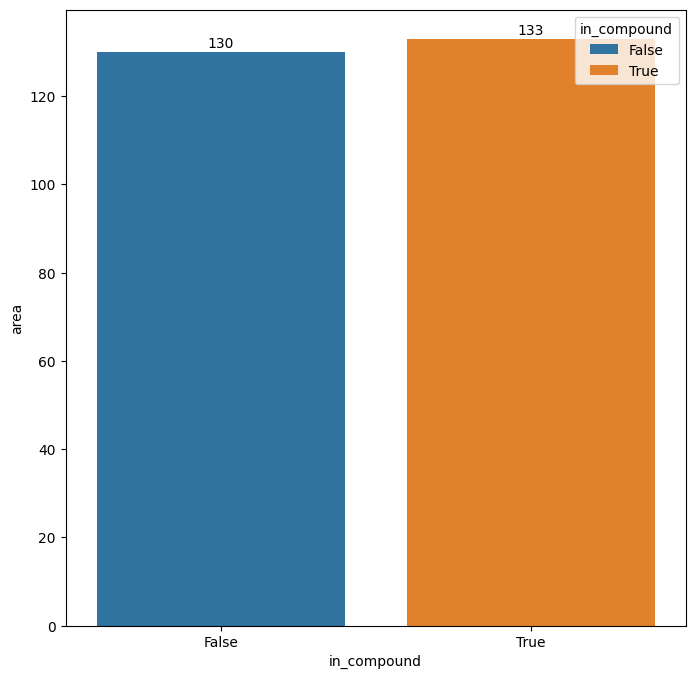

In [173]:
plt.figure(figsize=(8, 8))
ax=sns.barplot(data=data ,x='in_compound' , y='area' ,hue='in_compound',estimator='median', ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=0)
plt.show()

<span style="color:white; font-size:40px; font-weight:bold;">4- What is the most common type of housing unit? </span>

In [174]:
data.groupby('type_of_unite')['type_of_unite'].count()

type_of_unite
Apartment    16874
Duplex         178
Penthouse      141
Studio         867
Name: type_of_unite, dtype: int64

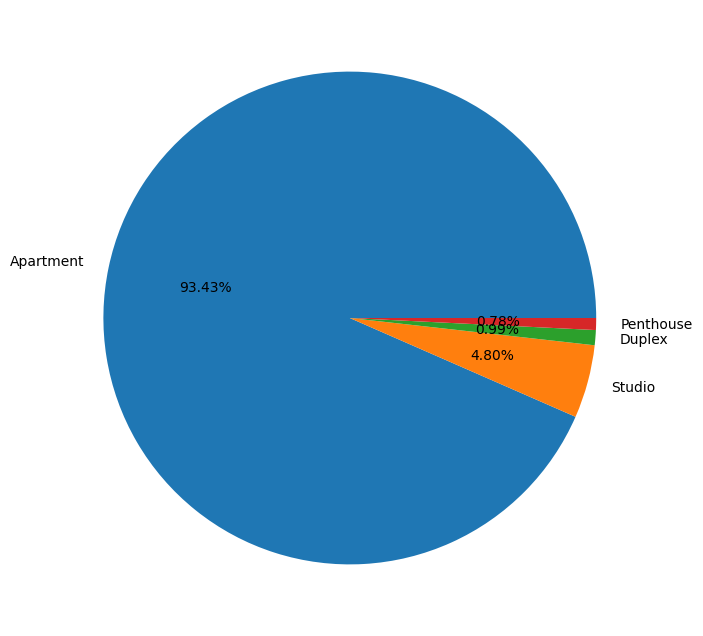

In [175]:
pie_func('type_of_unite',dataframe=data)


<span style="color:white; font-size:40px; font-weight:bold;"> 5- What is the average <span style="color:orange;">price</span> for each unit type?</span>

  type_of_unite         price
0     Penthouse  6.865641e+06
1        Duplex  4.964311e+06
2        Studio  3.965850e+06
3     Apartment  3.688593e+06


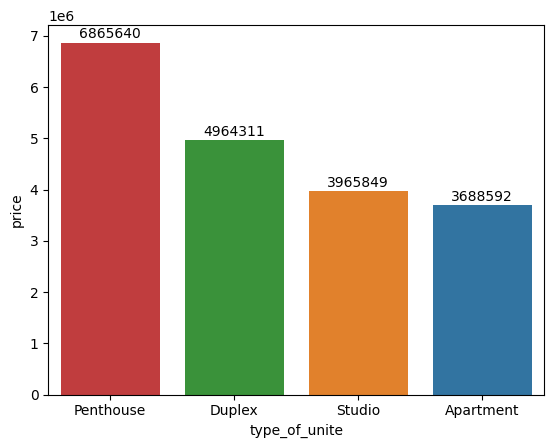

In [176]:
x=data.groupby('type_of_unite')['price'].mean().sort_values(ascending=False)
print(x.reset_index())
ax=sns.barplot(data=data ,x='type_of_unite' , y='price',hue='type_of_unite' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=0)
plt.show()


<span style="color:white; font-size:40px; font-weight:bold;"> 6- What is the average <span style="color:orange;">price_per_meter</span> for each unit type?</span>

In [177]:
x=data.groupby('type_of_unite')['price_per_meter'].mean().sort_values(ascending=False)
x

type_of_unite
Studio       60603.620531
Penthouse    47305.482270
Apartment    27821.864466
Duplex       24642.511236
Name: price_per_meter, dtype: float64

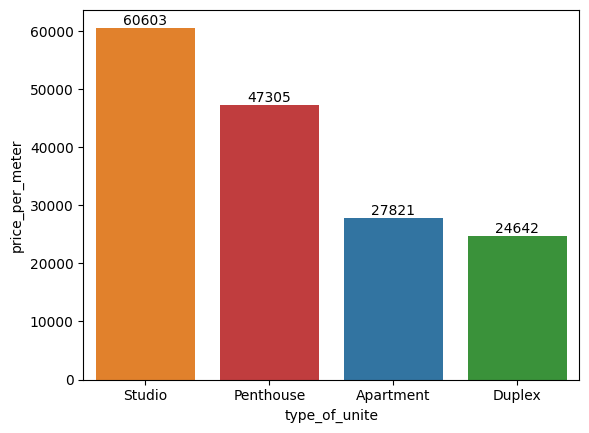

In [178]:
ax=sns.barplot(data=data ,x='type_of_unite' , y='price_per_meter',hue='type_of_unite' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.xticks(rotation=0)
plt.show()


<span style="color:white; font-size:40px; font-weight:bold;">7- What is the effect of owner type (developer, broker, direct owner) on price? </span>

owner_type
Developer               4.559526e+06
Compound Developer      3.862964e+06
Real Estate Marketer    3.826286e+06
Property Owner          1.642895e+06
Name: price, dtype: float64


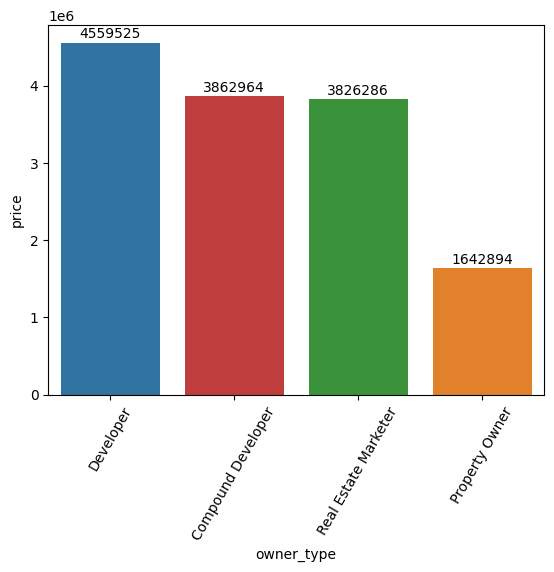

In [179]:
x=data.groupby('owner_type')['price'].mean().sort_values(ascending=False)
print(x)
ax=sns.barplot(data=data ,x='owner_type' , y='price',hue='owner_type' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()

owner_type
Developer               38011.816381
Real Estate Marketer    29823.258668
Compound Developer      25928.234043
Property Owner          13060.443820
Name: price_per_meter, dtype: float64


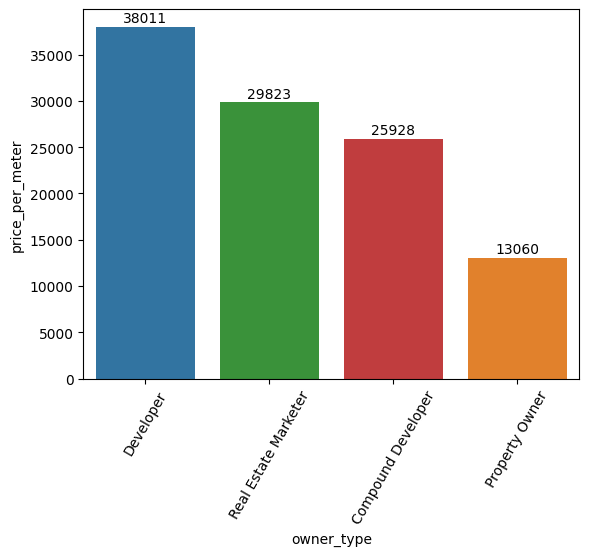

In [180]:
x=data.groupby('owner_type')['price_per_meter'].mean().sort_values(ascending=False)
print(x)
ax=sns.barplot(data=data ,x='owner_type' , y='price_per_meter',hue='owner_type' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()


<span style="color:white; font-size:40px; font-weight:bold;">8- What is the difference in rooms and area across different building_category? </span>

In [181]:
data.columns

Index(['city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area',
       'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
       'year_of_building', 'views', 'has_reviews', 'payment_method',
       'price_per_meter', 'price', 'area_category', 'floor_category',
       'building_category'],
      dtype='object')

building_category
old       3.0
medium    3.0
new       2.0
Name: rooms, dtype: float64


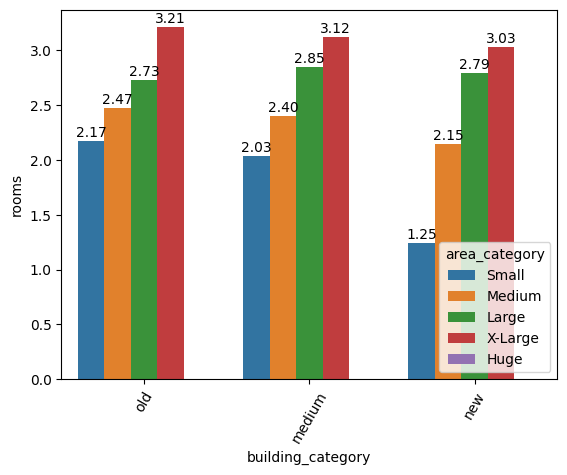

In [182]:
data.rooms=data.rooms.astype(int)
x=data.groupby('building_category')['rooms'].mean().sort_values(ascending=False).round()
print(x)
ax=sns.barplot(data=data ,x='building_category' , y='rooms',hue='area_category' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()

<span style="color:white; font-size:40px; font-weight:bold;">9- What is the average number of rooms for each area category? </span>

area_category
X-Large    3.047813
Large      2.797228
Medium     2.207759
Small      1.333172
Name: rooms, dtype: float64


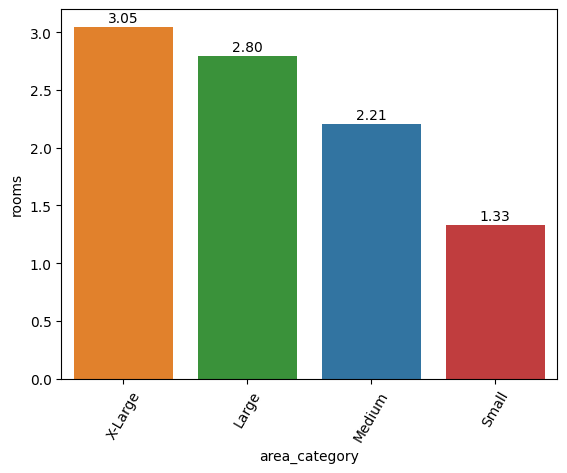

In [183]:
data['area_category']=data['area_category'].astype('str')
x=data.groupby('area_category')['rooms'].mean().sort_values(ascending=False)
print(x)
ax=sns.barplot(data=data ,x='area_category' , y='rooms',hue='area_category' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()

<span style="color:white; font-size:40px; font-weight:bold;">9- What is the relationship between number of rooms and price for each building_category? </span>

In [184]:
data.columns

Index(['city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area',
       'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
       'year_of_building', 'views', 'has_reviews', 'payment_method',
       'price_per_meter', 'price', 'area_category', 'floor_category',
       'building_category'],
      dtype='object')

<Axes: xlabel='rooms', ylabel='price'>

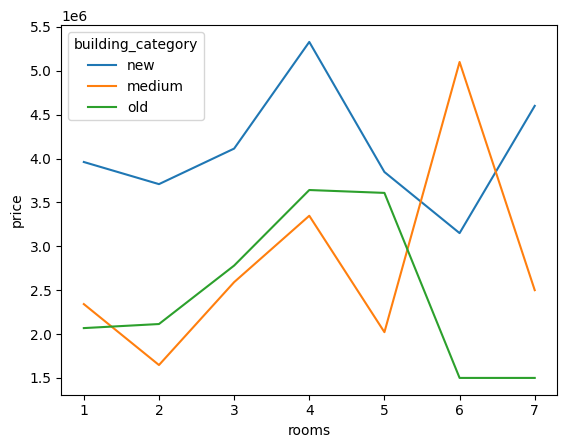

In [185]:
sns.lineplot(data=data , x='rooms',y='price',ci=None , hue='building_category')

rooms
4    4.869042e+06
1    3.928690e+06
3    3.867841e+06
5    3.537664e+06
2    3.353440e+06
6    3.210000e+06
7    2.866667e+06
Name: price, dtype: float64


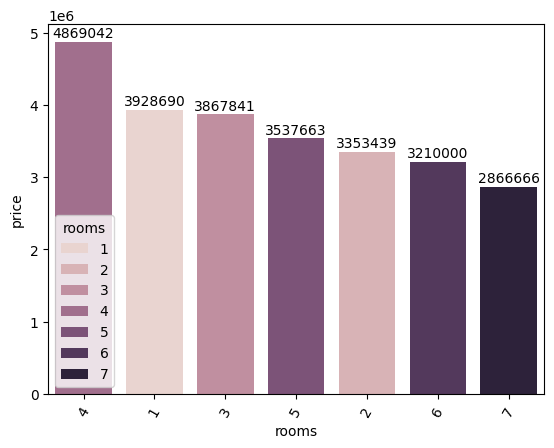

In [186]:
x=data.groupby('rooms')['price'].mean().sort_values(ascending=False)
print(x)
ax=sns.barplot(data=data ,x='rooms' , y='price',hue='rooms' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()

<span style="color:white; font-size:40px; font-weight:bold;"> 10- What is the price per meter for small vs. large apartments?</span>

In [187]:
data.type_of_unite.unique()

array(['Apartment', 'Studio', 'Duplex', 'Penthouse'], dtype=object)

area_category
Large    26827.748154
Small    40873.969357
Name: price_per_meter, dtype: float64


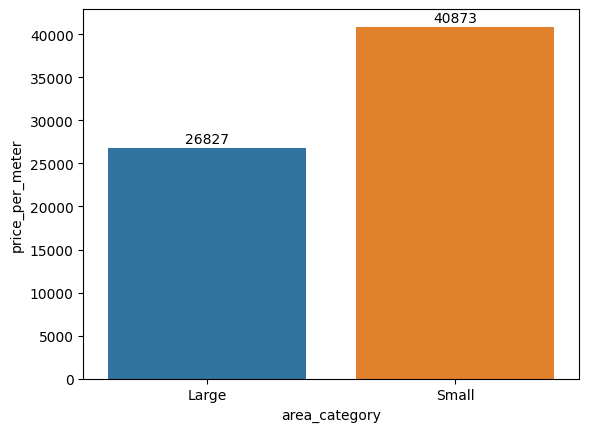

In [188]:
new_data=data[(data['area_category'].isin(['Small','Large']))&(data.type_of_unite=='Apartment')]
x=new_data.groupby('area_category')['price_per_meter'].mean()
print(x)
ax=sns.barplot(data=new_data ,x='area_category' , y='price_per_meter',hue='area_category' , ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)

plt.show()

<span style="color:white; font-size:40px; font-weight:bold;"> 11- What is the effect of finishing status on price?</span>

finish_status
Extra Super Luxury    38092.753770
Unfinished            31598.575311
Semi-Finished         29398.341085
Super Luxury          24831.391112
Luxury                21171.541361
Name: price_per_meter, dtype: float64


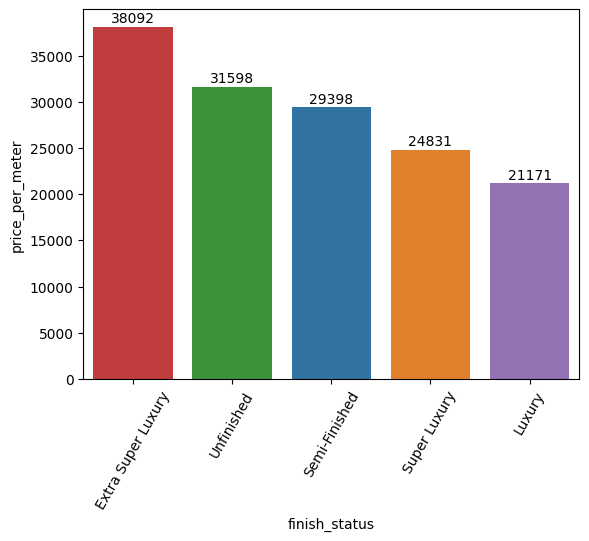

In [189]:
x=data.groupby('finish_status')['price_per_meter'].mean().sort_values(ascending=False)
print(x)
ax=sns.barplot(data=data ,x='finish_status' , y='price_per_meter',hue='finish_status' ,order=x.index, ci=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=1)
plt.xticks(rotation=60)
plt.show()

<span style="color:orange; font-size:80px; font-weight:bold;">Step 2: Data Preprocessing</span>


In [190]:

from sklearn.model_selection import train_test_split 
from sklearn.impute import KNNImputer , SimpleImputer
from sklearn.preprocessing import  OneHotEncoder ,OrdinalEncoder ,StandardScaler
from category_encoders import BinaryEncoder


In [191]:
mod_data=df.copy()

In [192]:
# Drop unnecessary columns that are not useful for modeling or analysis
mod_data.drop(columns=[
    'ad_id', 'ad_title', 'location', 'total_reviews', 'region_rating',
    'schools_rating', 'services', 'quietness', 'location_rating',
    'transportation_rating', 'markets_rating', 'description', 'link'
], inplace=True)

# Display the first few rows to confirm the changes
mod_data.head()

# Define the final list of columns to keep for modeling and analysis
col = [
    'city', 'region', 'type_of_unite', 'in_compound', 'owner_type', 'area',
    'rooms', 'bathrooms', 'floor_number', 'elevator', 'finish_status',
    'year_of_building', 'views', 'has_reviews', 'payment_method',
    'price_per_meter', 'price'
]

# Filter the DataFrame to include only the selected columns
mod_data = mod_data[col]

# Display the first few rows of the cleaned and filtered dataset
mod_data.head()


city                              region type_of_unite  \
0  Greater Cairo              Vida Residence - Kayan     Apartment   
1  Greater Cairo                  شارع كورنيش المقطم     Apartment   
2  Greater Cairo  كمبوند ذا ايكون جاردنز - ستايل هوم     Apartment   
3  Greater Cairo            شارع جامعة الدول العربية        Duplex   
4  Greater Cairo         تاج سلطان - كمبوند تاج سيتي     Apartment   

   in_compound            owner_type  area rooms bathrooms floor_number  \
0            0             Developer    96     2         2            2   
1            0        Property Owner   230     4         2            2   
2            1  Real Estate Marketer   160     3         2            2   
3            0  Real Estate Marketer   300     3         3           11   
4            1  Real Estate Marketer   110     2         2            0   

  elevator       finish_status year_of_building        views  has_reviews  \
0    False       Semi-Finished             2028  Main Street         True   
1    False        Super Luxury             2025       Corner         True   
2    False       Semi-Finished             2027       Garden         True   
3     True  Extra Super Luxury             2020  Side Street         True   
4    False       Semi-Finished             2025       Garden         True   

        payment_method  price_per_meter    price  
0  Cash or Installment            20000  1920000  
1                 Cash            22174  5100000  
2                 Cash            29250  4680000  
3                 Cash            30000  9000000  
4                 Cash            53636  5900000

In [193]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23688 entries, 0 to 23691
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              23688 non-null  object
 1   region            23688 non-null  object
 2   type_of_unite     23688 non-null  object
 3   in_compound       23688 non-null  int64 
 4   owner_type        23688 non-null  object
 5   area              23688 non-null  int64 
 6   rooms             22290 non-null  object
 7   bathrooms         20719 non-null  object
 8   floor_number      22456 non-null  object
 9   elevator          23688 non-null  object
 10  finish_status     23459 non-null  object
 11  year_of_building  23454 non-null  object
 12  views             19798 non-null  object
 13  has_reviews       23688 non-null  bool  
 14  payment_method    23688 non-null  object
 15  price_per_meter   23688 non-null  int64 
 16  price             23688 non-null  int64 
dtypes: bool(1), int64

In [194]:
mod_data.describe()

in_compound          area  price_per_meter         price
count  23688.000000  23688.000000     23688.000000  2.368800e+04
mean       0.374789    143.303318     34659.017266  4.850785e+06
std        0.484079     56.593501     29858.597372  4.980851e+06
min        0.000000     10.000000       833.000000  1.070000e+05
25%        0.000000    106.000000     15000.000000  2.100000e+06
50%        0.000000    135.000000     27228.000000  3.696000e+06
75%        1.000000    168.250000     46410.000000  5.685250e+06
max        1.000000    740.000000    750000.000000  1.500000e+08

In [195]:
mod_data.describe(exclude='number')

city             region type_of_unite            owner_type  \
count           23688              23688         23688                 23688   
unique             28               2607             4                     5   
top     Greater Cairo  El Khamsin Street     Apartment  Real Estate Marketer   
freq            17799                654         21528                 16686   

        rooms bathrooms floor_number elevator  finish_status year_of_building  \
count   22290     20719        22456    23688          23459            23454   
unique      9         6           24        2              5               72   
top         3         2            2    False  Semi-Finished             2025   
freq    12414      8830         4435    17345           8133             6044   

              views has_reviews payment_method  
count         19798       23688          23688  
unique           13           2              3  
top     Main Street       False           Cash  
freq           9292       16102          11255

In [196]:
mod_data.duplicated().sum()

np.int64(2206)

In [197]:
mod_data[mod_data.duplicated(keep=False)].sort_values(['city','region']).head()

city     region type_of_unite  in_compound            owner_type  \
9095   Alexandria  Al Bitash     Apartment            0  Real Estate Marketer   
9517   Alexandria  Al Bitash     Apartment            0  Real Estate Marketer   
9639   Alexandria  Al Bitash     Apartment            0  Real Estate Marketer   
9679   Alexandria  Al Bitash     Apartment            0  Real Estate Marketer   
17943  Alexandria  Al Bitash     Apartment            0  Real Estate Marketer   

       area rooms bathrooms floor_number elevator finish_status  \
9095    110     2         1            4    False  Super Luxury   
9517    110     2         1            4    False  Super Luxury   
9639    110     2         1            3    False  Super Luxury   
9679    110     2         1            3    False  Super Luxury   
17943   130     3         1            6     True  Super Luxury   

      year_of_building        views  has_reviews payment_method  \
9095              2007          NaN         True           Cash   
9517              2007          NaN         True           Cash   
9639              2020  Main Street         True           Cash   
9679              2020  Main Street         True           Cash   
17943             2020  Main Street        False           Cash   

       price_per_meter    price  
9095              8636   950000  
9517              8636   950000  
9639              7000   770000  
9679              7000   770000  
17943            10769  1400000

In [198]:
mod_data.drop_duplicates(inplace=True , ignore_index=True)

In [199]:
mod_data.isna().sum()

city                   0
region                 0
type_of_unite          0
in_compound            0
owner_type             0
area                   0
rooms               1384
bathrooms           2950
floor_number        1223
elevator               0
finish_status        220
year_of_building     225
views               3653
has_reviews            0
payment_method         0
price_per_meter        0
price                  0
dtype: int64

In [200]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21482 entries, 0 to 21481
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              21482 non-null  object
 1   region            21482 non-null  object
 2   type_of_unite     21482 non-null  object
 3   in_compound       21482 non-null  int64 
 4   owner_type        21482 non-null  object
 5   area              21482 non-null  int64 
 6   rooms             20098 non-null  object
 7   bathrooms         18532 non-null  object
 8   floor_number      20259 non-null  object
 9   elevator          21482 non-null  object
 10  finish_status     21262 non-null  object
 11  year_of_building  21257 non-null  object
 12  views             17829 non-null  object
 13  has_reviews       21482 non-null  bool  
 14  payment_method    21482 non-null  object
 15  price_per_meter   21482 non-null  int64 
 16  price             21482 non-null  int64 
dtypes: bool(1), 

In [201]:
# Categorize apartment areas into size-based bins
bins = [0, 80, 120, 160, 250, 10000]
labels = ['Small', 'Medium', 'Large', 'X-Large', 'Huge']

mod_data['area_category'] = pd.cut(mod_data['area'], bins=bins, labels=labels)

In [202]:
mod_data.dtypes

city                  object
region                object
type_of_unite         object
in_compound            int64
owner_type            object
area                   int64
rooms                 object
bathrooms             object
floor_number          object
elevator              object
finish_status         object
year_of_building      object
views                 object
has_reviews             bool
payment_method        object
price_per_meter        int64
price                  int64
area_category       category
dtype: object

In [203]:
# Convert selected columns to numeric data types
# This ensures compatibility with models and imputers

mod_data.rooms=mod_data.rooms.astype(float)
mod_data.bathrooms=mod_data.bathrooms.astype(float)
mod_data.floor_number=mod_data.floor_number.astype(float)
mod_data.year_of_building=mod_data.year_of_building.astype(float)
mod_data.elevator=mod_data.elevator.astype(int)
mod_data.has_reviews=mod_data.has_reviews.astype(int)

In [204]:
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21482 entries, 0 to 21481
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   city              21482 non-null  object  
 1   region            21482 non-null  object  
 2   type_of_unite     21482 non-null  object  
 3   in_compound       21482 non-null  int64   
 4   owner_type        21482 non-null  object  
 5   area              21482 non-null  int64   
 6   rooms             20098 non-null  float64 
 7   bathrooms         18532 non-null  float64 
 8   floor_number      20259 non-null  float64 
 9   elevator          21482 non-null  int64   
 10  finish_status     21262 non-null  object  
 11  year_of_building  21257 non-null  float64 
 12  views             17829 non-null  object  
 13  has_reviews       21482 non-null  int64   
 14  payment_method    21482 non-null  object  
 15  price_per_meter   21482 non-null  int64   
 16  price             2148

In [205]:
# Isolate rare regions that appear 2 times or less
cat = mod_data.region.value_counts()[mod_data.region.value_counts() <= 2].index
train_1 = mod_data[mod_data.region.isin(cat)]
train_1.head() 

city                       region type_of_unite  in_compound  \
1   Greater Cairo           شارع كورنيش المقطم     Apartment            0   
28  Greater Cairo  شارع كورنيش النيل - الزمالك     Apartment            0   
58  Greater Cairo            شارع أحمد ابراهيم     Apartment            0   
70  Greater Cairo      بوليفارد ريزيدنس ميفيدا     Apartment            0   
72  Greater Cairo  سبيكترام - كمبوند ايست تاون     Apartment            1   

              owner_type  area  rooms  bathrooms  floor_number  elevator  \
1         Property Owner   230    4.0        2.0           2.0         0   
28             Developer   174    3.0        2.0           5.0         1   
58        Property Owner   150    3.0        2.0           6.0         1   
70  Real Estate Marketer   168    2.0        2.0           2.0         0   
72  Real Estate Marketer   156    2.0        3.0           1.0         0   

         finish_status  year_of_building        views  has_reviews  \
1         Super Luxury            2025.0       Corner            1   
28  Extra Super Luxury            2025.0  Main Street            1   
58        Super Luxury            2002.0       Corner            1   
70  Extra Super Luxury            2025.0       Garden            1   
72       Semi-Finished            2025.0       Garden            1   

   payment_method  price_per_meter     price area_category  
1            Cash            22174   5100000       X-Large  
28           Cash            43103   7500000       X-Large  
58           Cash            19333   2900000         Large  
70           Cash            92262  15500000       X-Large  
72           Cash            75000  11700000         Large

In [206]:
# dropd them from maine data 
mod_data.drop(index=train_1.index,inplace=True)

In [207]:
# Split the data into train and test sets while preserving the distribution of 'region'
train, test = train_test_split(mod_data, test_size=0.15, random_state=9, stratify=mod_data['region'])

# Append rare-region rows (with frequency <= 2) to the training set to ensure all categories are encoded
train_new = pd.concat([train, train_1], axis=0, ignore_index=True)

# Check new training set size
train_new.shape


(18515, 18)

In [208]:
test.isna().sum()

city                  0
region                0
type_of_unite         0
in_compound           0
owner_type            0
area                  0
rooms               202
bathrooms           438
floor_number        171
elevator              0
finish_status        28
year_of_building     31
views               504
has_reviews           0
payment_method        0
price_per_meter       0
price                 0
area_category         0
dtype: int64

In [209]:
# Split features and target variable for training and testing sets

# Exclude 'price' and 'price_per_meter' from features
x_train = train_new.drop(columns=['price', 'price_per_meter'])
y_train = train_new['price']

x_test = test.drop(columns=['price', 'price_per_meter'])
y_test = test['price']


In [210]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18515 entries, 0 to 18514
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   city              18515 non-null  object  
 1   region            18515 non-null  object  
 2   type_of_unite     18515 non-null  object  
 3   in_compound       18515 non-null  int64   
 4   owner_type        18515 non-null  object  
 5   area              18515 non-null  int64   
 6   rooms             17333 non-null  float64 
 7   bathrooms         16003 non-null  float64 
 8   floor_number      17463 non-null  float64 
 9   elevator          18515 non-null  int64   
 10  finish_status     18323 non-null  object  
 11  year_of_building  18321 non-null  float64 
 12  views             15366 non-null  object  
 13  has_reviews       18515 non-null  int64   
 14  payment_method    18515 non-null  object  
 15  area_category     18515 non-null  category
dtypes: category(1), float6

In [211]:
numric_col=x_train.select_dtypes(include='number').columns.to_list()
numric_col

['in_compound',
 'area',
 'rooms',
 'bathrooms',
 'floor_number',
 'elevator',
 'year_of_building',
 'has_reviews']

In [212]:

# Apply KNN Imputer to fill missing values in numerical columns
# This method uses the average of the nearest 5 neighbors to estimate missing values

imput_s = KNNImputer(n_neighbors=5)

# Fit on training data and transform both train and test
x_train[numric_col] = imput_s.fit_transform(x_train[numric_col]).round()
x_test[numric_col] = imput_s.transform(x_test[numric_col]).round()


In [213]:
cat_col=x_train.select_dtypes(exclude='number').columns.to_list()
cat_col

['city',
 'region',
 'type_of_unite',
 'owner_type',
 'finish_status',
 'views',
 'payment_method',
 'area_category']

In [214]:
# Fill missing values in categorical columns using the most frequent value (mode)

imput_s = SimpleImputer(strategy='most_frequent')

# Fit the imputer on training data and apply it to both train and test sets
x_train[cat_col] = imput_s.fit_transform(x_train[cat_col])
x_test[cat_col] = imput_s.transform(x_test[cat_col])


In [215]:
# Convert 'year_of_building' into categorical labels:
# 'old' if built before 2000, 'medium' if between 2000–2015, 'new' if after 2015

def categorize_year(y):
    if pd.isna(y):
        return np.nan
    elif y < 2000:
        return 'old'
    elif y <= 2015:
        return 'medium'
    else:
        return 'new'

# Apply categorization to both training and test sets
x_train['building_category'] = x_train['year_of_building'].apply(categorize_year)
x_test['building_category'] = x_test['year_of_building'].apply(categorize_year)


In [216]:
# Convert floor number into categorical labels:
# 'ground'     → 0
# 'low'        → 1–3
# 'mid'        → 4–7
# 'high'       → 8–14
# 'top_floor'  → 15 and above

def floor_category(x):
    if x == 0:
        return 'ground'
    elif x <= 3:
        return 'low'
    elif x <= 7:
        return 'mid'
    elif x < 15:
        return 'high'
    elif x >= 15:
        return 'top_floor'
    else:
        return x  # fallback in case of invalid or missing value

# Apply categorization to both training and test sets
x_train['floor_category'] = x_train['floor_number'].astype(float).apply(floor_category)
x_test['floor_category'] = x_test['floor_number'].astype(float).apply(floor_category)


In [217]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18515 entries, 0 to 18514
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               18515 non-null  object 
 1   region             18515 non-null  object 
 2   type_of_unite      18515 non-null  object 
 3   in_compound        18515 non-null  float64
 4   owner_type         18515 non-null  object 
 5   area               18515 non-null  float64
 6   rooms              18515 non-null  float64
 7   bathrooms          18515 non-null  float64
 8   floor_number       18515 non-null  float64
 9   elevator           18515 non-null  float64
 10  finish_status      18515 non-null  object 
 11  year_of_building   18515 non-null  float64
 12  views              18515 non-null  object 
 13  has_reviews        18515 non-null  float64
 14  payment_method     18515 non-null  object 
 15  area_category      18515 non-null  object 
 16  building_category  185

In [218]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2967 entries, 3904 to 7179
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               2967 non-null   object 
 1   region             2967 non-null   object 
 2   type_of_unite      2967 non-null   object 
 3   in_compound        2967 non-null   float64
 4   owner_type         2967 non-null   object 
 5   area               2967 non-null   float64
 6   rooms              2967 non-null   float64
 7   bathrooms          2967 non-null   float64
 8   floor_number       2967 non-null   float64
 9   elevator           2967 non-null   float64
 10  finish_status      2967 non-null   object 
 11  year_of_building   2967 non-null   float64
 12  views              2967 non-null   object 
 13  has_reviews        2967 non-null   float64
 14  payment_method     2967 non-null   object 
 15  area_category      2967 non-null   object 
 16  building_category  2967 no

# OrdinalEncoder for sum columns

In [219]:
cols = ['finish_status', 'building_category', 'floor_category','area_category']
for col in cols:
    print(x_train[col].unique())


['Unfinished' 'Super Luxury' 'Extra Super Luxury' 'Semi-Finished' 'Luxury']
['new' 'medium' 'old']
['mid' 'high' 'low' 'ground' 'top_floor']
['X-Large' 'Medium' 'Small' 'Large' 'Huge']


In [220]:
# Apply Ordinal Encoding to ordered categorical features
# Each list in `categories` defines the specific order for that column

category = [
    ['Unfinished', 'Semi-Finished', 'Luxury', 'Super Luxury', 'Extra Super Luxury'],  # finish_status
    ['old', 'medium', 'new'],                                                        # building_category
    ['top_floor', 'high', 'mid', 'low', 'ground'],                                   # floor_category
    ['Small', 'Medium', 'Large', 'X-Large', 'Huge']                                   # area_category
]

encoder = OrdinalEncoder(categories=category)

# Fit the encoder on training data and apply to both training and test sets
x_train[cols] = encoder.fit_transform(x_train[cols])
x_test[cols] = encoder.transform(x_test[cols])




# pipeline for anther columns

In [221]:
cols_for_onehotencoder=['type_of_unite','owner_type','payment_method']
for col in cols_for_onehotencoder:
    print(x_train[col].unique())

['Apartment' 'Studio' 'Duplex' 'Penthouse']
['Developer' 'Property Owner' 'Real Estate Marketer' 'Compound Developer'
 'Broker']
['Cash or Installment' 'Cash' 'Installment']


In [222]:
cols_for_binaryencoder=['city','region','views']
for col in cols_for_binaryencoder:
    print(x_train[col].unique())

['Greater Cairo' 'North Coast' 'Hurghada' 'Alexandria' 'Fayoum'
 'Marsa Matrouh' 'Dakahlia' 'Gharbia' 'Sharqia' 'Damietta' 'Ain Sokhna'
 'Monufia' 'Qalyubia' 'Sharm El-Sheikh' 'Kafr El-Sheikh' 'Assiut'
 'Port Said' 'Beheira' 'Ismailia' 'Sohag' 'Minya' 'Ras Sudr' 'North Sinai'
 'Suez' 'Qena' 'Luxor' 'Aswan' 'Beni Suef']
['كمبوند بيلفا - الكرنك' 'حدائق حلوان' 'كمبوند بالم ايست - تي جي' ...
 'لوسيل ريزيدنس - مارجينز' 'شارع يحي المشد' 'النرجس 6']
['Main Street' 'Corner' 'Garden' 'Golf' 'Swimming Pool' 'Side Street'
 'Sea' 'Back Side' 'Lake' 'Plaza' 'Nile View' 'Secondary Street' 'Club']


In [223]:
col_scaler=['area','year_of_building']

In [224]:
# Apply multiple preprocessing steps using ColumnTransformer:
# - OneHotEncoder for nominal categorical columns
# - BinaryEncoder for high-cardinality categorical columns
# - StandardScaler for numerical columns
# The rest of the columns will be passed through unchanged

from sklearn.compose import ColumnTransformer

one_hotencoder = OneHotEncoder(handle_unknown='ignore')      # Avoid errors on unseen categories in test set
binary_enc = BinaryEncoder(cols=cols_for_binaryencoder)      # Efficient encoding for high-cardinality features
scaler = StandardScaler()                                    # Standardize numeric features

preprocessor = ColumnTransformer(transformers=[
    ('onehot', one_hotencoder, cols_for_onehotencoder),      # One-hot encoding
    ('binary', binary_enc, cols_for_binaryencoder),          # Binary encoding
    ('scale', scaler, col_scaler)                            # Scaling
], remainder='passthrough')                                  # Leave other columns unchanged

# Apply transformations to both training and test sets
x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)


In [225]:
# Extract feature names from each transformer:
# - OneHotEncoder columns with category names
# - BinaryEncoder columns
# - Columns passed through without transformation

ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(cols_for_onehotencoder)
binary_feature_names = preprocessor.named_transformers_['binary'].get_feature_names_out()

# Identify columns that were passed through without any transformation
pass_through_cols = [
    col for col in x_train.columns 
    if col not in (cols_for_onehotencoder + cols_for_binaryencoder + col_scaler)
]

# Combine all final column names
all_columns = list(ohe_feature_names) + list(binary_feature_names) + col_scaler + pass_through_cols

# Convert transformed arrays back to DataFrames with proper column names and index
x_train_encoded = pd.DataFrame(x_train_encoded, columns=all_columns, index=x_train.index)
x_test_encoded = pd.DataFrame(x_test_encoded, columns=all_columns, index=x_test.index)



In [226]:
x_train_encoded

type_of_unite_Apartment  type_of_unite_Duplex  type_of_unite_Penthouse  \
0                          1.0                   0.0                      0.0   
1                          1.0                   0.0                      0.0   
2                          0.0                   0.0                      0.0   
3                          1.0                   0.0                      0.0   
4                          1.0                   0.0                      0.0   
...                        ...                   ...                      ...   
18510                      1.0                   0.0                      0.0   
18511                      1.0                   0.0                      0.0   
18512                      1.0                   0.0                      0.0   
18513                      1.0                   0.0                      0.0   
18514                      1.0                   0.0                      0.0   

       type_of_unite_Studio  owner_type_Broker  owner_type_Compound Developer  \
0                       0.0                0.0                            0.0   
1                       0.0                0.0                            0.0   
2                       1.0                0.0                            0.0   
3                       0.0                0.0                            0.0   
4                       0.0                0.0                            0.0   
...                     ...                ...                            ...   
18510                   0.0                0.0                            0.0   
18511                   0.0                0.0                            0.0   
18512                   0.0                0.0                            0.0   
18513                   0.0                0.0                            0.0   
18514                   0.0                0.0                            0.0   

       owner_type_Developer  owner_type_Property Owner  \
0                       1.0                        0.0   
1                       0.0                        1.0   
2                       1.0                        0.0   
3                       0.0                        0.0   
4                       1.0                        0.0   
...                     ...                        ...   
18510                   0.0                        0.0   
18511                   0.0                        0.0   
18512                   0.0                        0.0   
18513                   0.0                        0.0   
18514                   0.0                        0.0   

       owner_type_Real Estate Marketer  payment_method_Cash  \
0                                  0.0                  0.0   
1                                  0.0                  1.0   
2                                  0.0                  0.0   
3                                  1.0                  1.0   
4                                  0.0                  0.0   
...                                ...                  ...   
18510                              1.0                  1.0   
18511                              1.0                  1.0   
18512                              1.0                  0.0   
18513                              1.0                  1.0   
18514                              1.0                  1.0   

       payment_method_Cash or Installment  payment_method_Installment  city_0  \
0                                     1.0                         0.0     0.0   
1                                     0.0                         0.0     0.0   
2                                     1.0                         0.0     0.0   
3                                     0.0                         0.0     0.0   
4                                     1.0                         0.0     0.0   
...                                   ...                         ...     ...   
18510                                 0.

In [227]:
x_test_encoded

type_of_unite_Apartment  type_of_unite_Duplex  type_of_unite_Penthouse  \
3904                       1.0                   0.0                      0.0   
19013                      1.0                   0.0                      0.0   
3325                       1.0                   0.0                      0.0   
15455                      1.0                   0.0                      0.0   
21079                      1.0                   0.0                      0.0   
...                        ...                   ...                      ...   
19478                      0.0                   0.0                      0.0   
67                         1.0                   0.0                      0.0   
5569                       1.0                   0.0                      0.0   
12847                      1.0                   0.0                      0.0   
7179                       1.0                   0.0                      0.0   

       type_of_unite_Studio  owner_type_Broker  owner_type_Compound Developer  \
3904                    0.0                0.0                            0.0   
19013                   0.0                0.0                            0.0   
3325                    0.0                0.0                            0.0   
15455                   0.0                0.0                            0.0   
21079                   0.0                0.0                            0.0   
...                     ...                ...                            ...   
19478                   1.0                0.0                            0.0   
67                      0.0                0.0                            0.0   
5569                    0.0                0.0                            0.0   
12847                   0.0                0.0                            0.0   
7179                    0.0                0.0                            0.0   

       owner_type_Developer  owner_type_Property Owner  \
3904                    1.0                        0.0   
19013                   0.0                        0.0   
3325                    1.0                        0.0   
15455                   0.0                        1.0   
21079                   0.0                        0.0   
...                     ...                        ...   
19478                   0.0                        0.0   
67                      0.0                        0.0   
5569                    0.0                        0.0   
12847                   1.0                        0.0   
7179                    0.0                        0.0   

       owner_type_Real Estate Marketer  payment_method_Cash  \
3904                               0.0                  0.0   
19013                              1.0                  0.0   
3325                               0.0                  0.0   
15455                              0.0                  1.0   
21079                              1.0                  0.0   
...                                ...                  ...   
19478                              1.0                  0.0   
67                                 1.0                  0.0   
5569                               1.0                  1.0   
12847                              0.0                  0.0   
7179                               1.0                  1.0   

       payment_method_Cash or Installment  payment_method_Installment  city_0  \
3904                                  1.0                         0.0     0.0   
19013                                 1.0                         0.0     0.0   
3325                                  1.0                         0.0     0.0   
15455                                 0.0                         0.0     0.0   
21079                                 1.0                         0.0     0.0   
...                                   ...                         ...     ...   
19478                                 1.

In [229]:
# Export the cleaned dataset to a CSV file for modeling purposes
# - UTF-8 encoding ensures Arabic characters are saved correctly
# - index=False prevents pandas from saving the index column
x_train_encoded.to_csv('x_train.csv', encoding="utf-8-sig", index=False)
x_test_encoded.to_csv('x_test.csv', encoding="utf-8-sig", index=False)

<span style="color:orange; font-size:60px; font-weight:bold;">Conclusion</span>

In this project, we explored and cleaned a real estate dataset collected from Egypt, specifically sourced from the Aqarmap website , extracted useful features, handled missing values, and performed data preprocessing to prepare the dataset for modeling.

By carefully engineering features such as building category, floor category, and property type, and applying techniques like encoding and scaling, we ensured that the dataset is ready for machine learning models.

This pipeline will allow for effective property price prediction and further analysis that can support real estate investors and market researchers in making data-driven decisions.

<span style="color:green; font-size:20px; font-weight:bold;">Thank you for reading!</span>
